# Exploratory Data Analysis (EDA)

1. Understanding Data
2. Handling Missing Values 
3. Handling Outliers
4. Examining Variables
5. Encoding Categorical Variables
6. Exploring Distribution Situations (Skewness, Kurtosis, Normal (Gaussian) Distribution)

## 1. Understanding Data

In [1]:
## Data Analysis Phase
## Understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import missingno as msno
import warnings
from sklearn import preprocessing 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import kurtosis
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize

# To ignore warnings
warnings.filterwarnings('ignore')

# Set options to display all columns and rows without truncation
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
# Read the dataset from the "AdvancedHousePricing.csv" file using Pandas and store it in the 'dataset' variable
dataset = pd.read_csv("AdvancedHousePricing.csv")

# Print the shape of the dataset, which represents the number of rows and columns
print(dataset.shape)

(1460, 81)


In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Print the number of unique values for each column in the dataset
print('Unique column values')
dataset.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)


Unique column values


Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

The only column with unique values is the 'Id' column.

In [5]:
# Drop the column named "Id" from the DataFrame "dataset" along the columns (axis=1)
# The "inplace=True" parameter ensures that the changes are made directly to the original DataFrame, 
# and the modified DataFrame is displayed using the "head()" method.
dataset.drop("Id", axis=1, inplace=True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Print the shape of the DataFrame "dataset"
print(dataset.shape)

(1460, 80)


In [7]:
# Display concise information about the DataFrame "dataset"
# This includes data types, non-null counts, and memory usage information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

'MSSubClass', 'OverallQual' (Ranking), 'OverallCond' (Ranking) variables, which are among the discrete features, were added to categorical variables by converting their variable types to str.

In [8]:
dataset["MSSubClass"] = dataset["MSSubClass"].astype(str)
dataset["OverallQual"] = dataset["OverallQual"].astype(str)
dataset["OverallCond"] = dataset["OverallCond"].astype(str)

print("MSSubClass Data Types: ", dataset.dtypes["MSSubClass"])
print("OverallQual Data Types: ", dataset.dtypes["OverallQual"])
print("OverallCond Data Types: ", dataset.dtypes["OverallCond"])

MSSubClass Data Types:  object
OverallQual Data Types:  object
OverallCond Data Types:  object


### 1.1. Descriptive Statistics for Numeric Columns

In [9]:
# Generate descriptive statistics for numeric columns in the DataFrame "dataset"
# Transpose the result for a more readable format
dataset_descriptive_stats = dataset.describe().T
dataset_descriptive_stats

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0


## 2. Handling Missing Values

In [10]:
# Check the percentage of NaN values present in each feature
# Create a list of features with missing values
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 1]

# Print the feature name and the percentage of missing values
for feature in features_with_na:
    print("{}: {}% missing values".format(feature, np.round(dataset[feature].isnull().mean() * 100, 4)))

LotFrontage: 17.7397% missing values
Alley: 93.7671% missing values
MasVnrType: 59.726% missing values
MasVnrArea: 0.5479% missing values
BsmtQual: 2.5342% missing values
BsmtCond: 2.5342% missing values
BsmtExposure: 2.6027% missing values
BsmtFinType1: 2.5342% missing values
BsmtFinType2: 2.6027% missing values
FireplaceQu: 47.2603% missing values
GarageType: 5.5479% missing values
GarageYrBlt: 5.5479% missing values
GarageFinish: 5.5479% missing values
GarageQual: 5.5479% missing values
GarageCond: 5.5479% missing values
PoolQC: 99.5205% missing values
Fence: 80.7534% missing values
MiscFeature: 96.3014% missing values


Note: There is 1 missing value in the 'Electrical' column, but since the condition is set to return values greater than 1, the electrical variable is not included in this output.

In [11]:
# Count the number of missing values in each column of the DataFrame "dataset"
# The result is a Series showing the count of missing values for each column
dataset.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [12]:
# Display information about missing values, missing value percentages, and unique values
def missing_data(dataset, n):
    # Count the missing values in each column, sort in descending order
    missing_values = dataset.isnull().sum().sort_values(ascending=False)

    # Calculate the percentage of missing values for each column, sort in descending order
    missing_percentage = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending=False) * 100

    # Count the number of unique values in each column
    unique_values = dataset.nunique()

    # Create a DataFrame combining the above information
    missing_data_info = pd.concat([missing_values, missing_percentage, unique_values], axis=1, 
                                  keys=["Missing Values", "Missing Values Percentage", "Unique Values"], sort=False)
    
    # Display the first 'n' rows of the combined information
    print(missing_data_info.head(n))

# Call the function with the dataset and the number of rows to display
missing_data(dataset, 5)


             Missing Values  Missing Values Percentage  Unique Values
PoolQC                 1453                  99.520548              3
MiscFeature            1406                  96.301370              4
Alley                  1369                  93.767123              2
Fence                  1179                  80.753425              4
MasVnrType              872                  59.726027              3


In [13]:
# Display information about missing values, missing value percentages, and unique values for each column in the dataset
# Show the first 30 rows of this information
missing_data(dataset, 30)

              Missing Values  Missing Values Percentage  Unique Values
PoolQC                  1453                  99.520548              3
MiscFeature             1406                  96.301370              4
Alley                   1369                  93.767123              2
Fence                   1179                  80.753425              4
MasVnrType               872                  59.726027              3
FireplaceQu              690                  47.260274              5
LotFrontage              259                  17.739726            110
GarageCond                81                   5.547945              5
GarageQual                81                   5.547945              5
GarageFinish              81                   5.547945              3
GarageYrBlt               81                   5.547945             97
GarageType                81                   5.547945              6
BsmtFinType2              38                   2.602740              6
BsmtEx

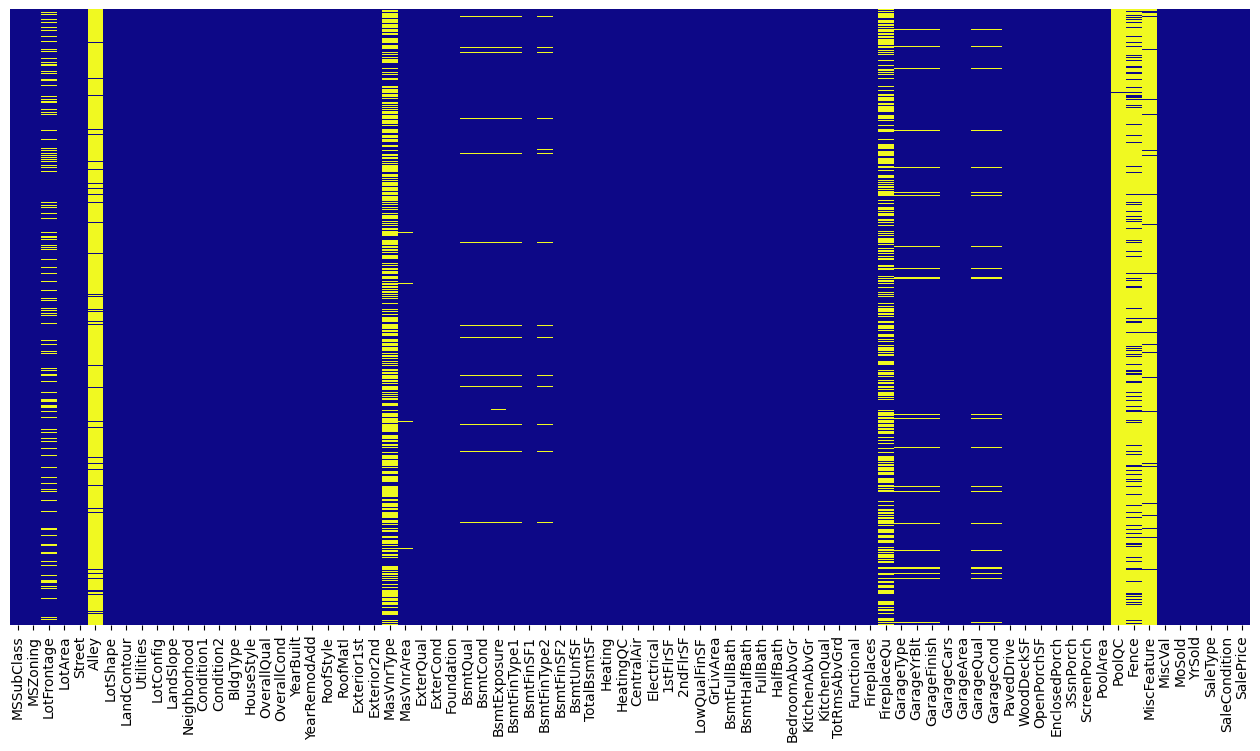

In [14]:
# Set the figure size for the heatmap
mpl.rcParams["figure.figsize"] = (16, 8)

# Create a heatmap to visually represent missing values in the DataFrame "dataset"
# Yellow lines indicate missing values (True in the heatmap), while non-missing values are represented in blue
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="plasma");


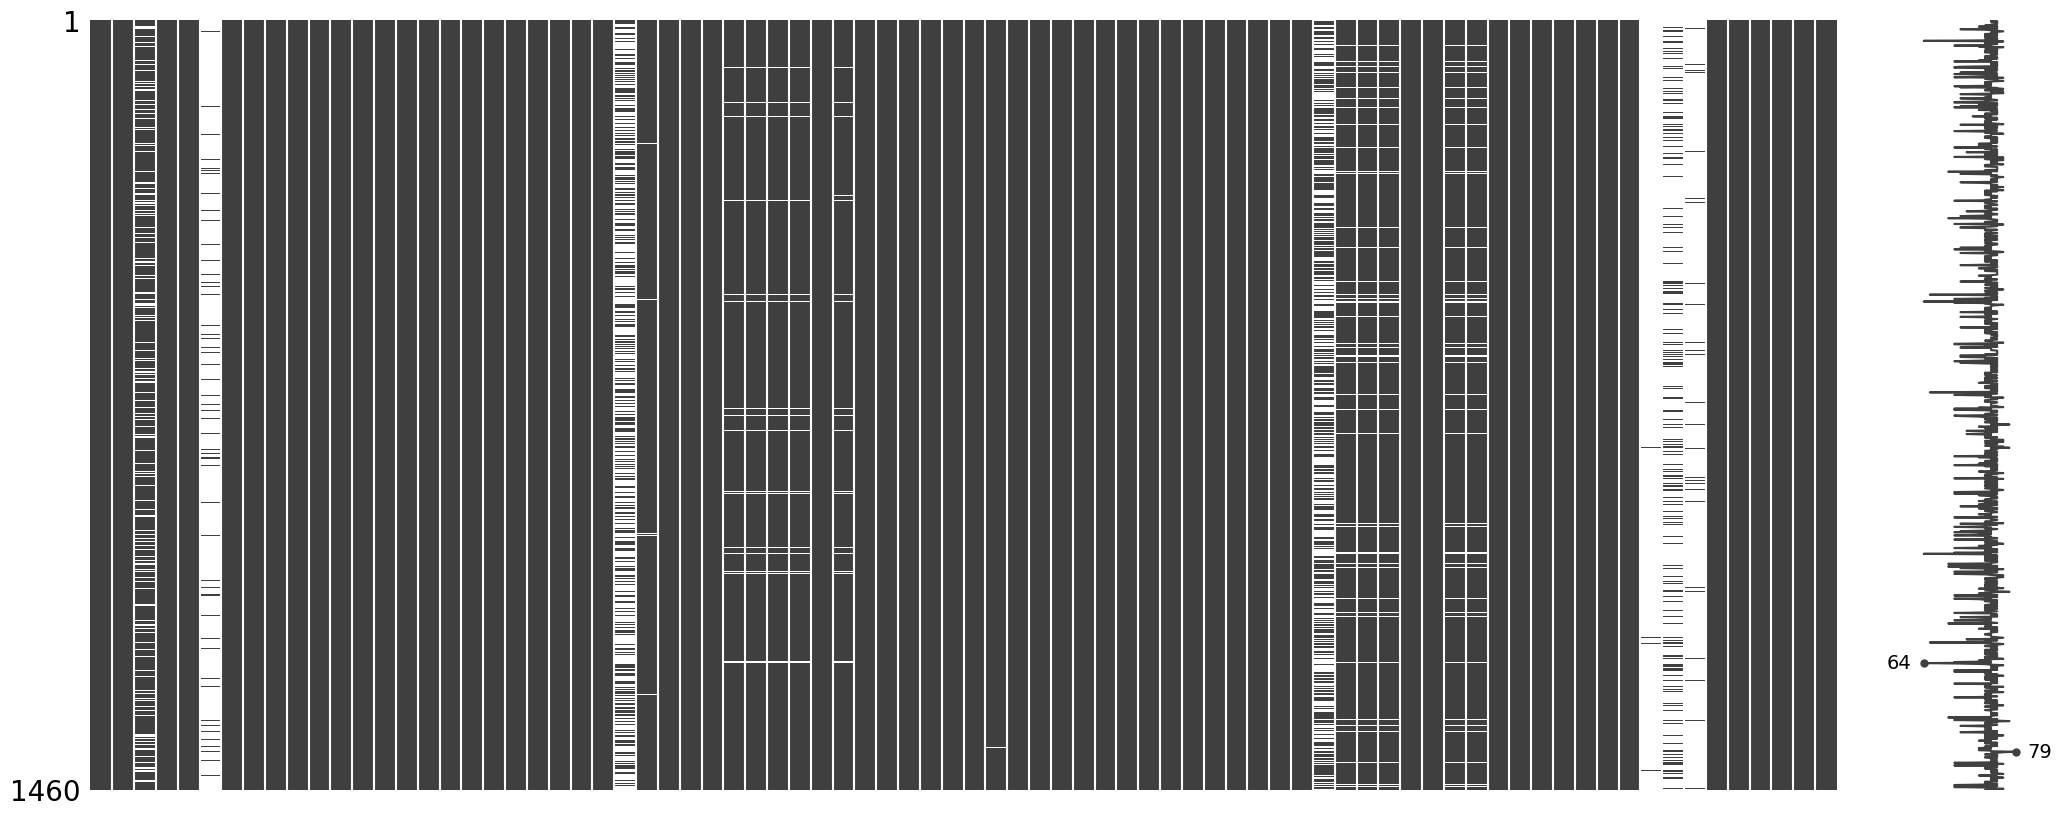

In [15]:
# Another way to observe missing values via matrix 
msno.matrix(dataset);

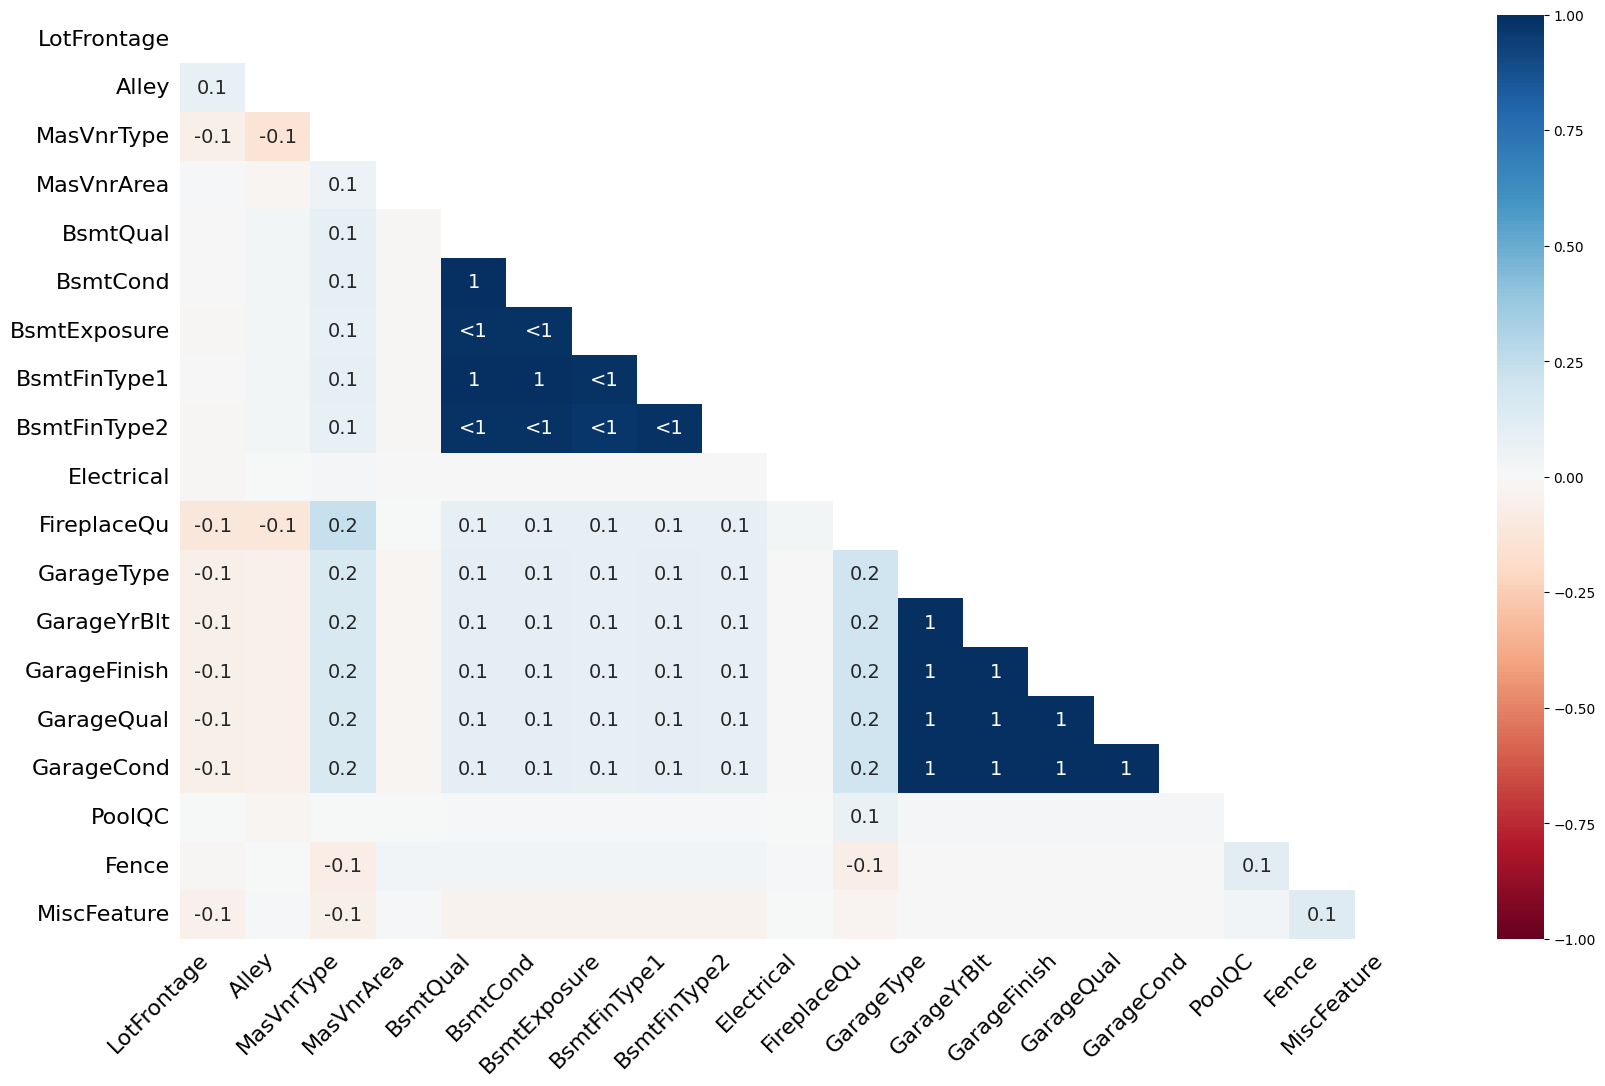

In [16]:
# Nullity Correlation
# Create a heatmap visualization of missing values in the dataset
msno.heatmap(dataset);


According to the above heatmap, the missing values of the garage variables (GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond) are related to each other (their correlation is 1). Therefore, the absence of a garage is associated with all garage variables. The same situation applies to basement variables (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) (their correlation is closer to 1).

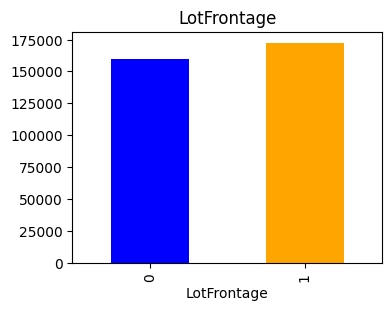

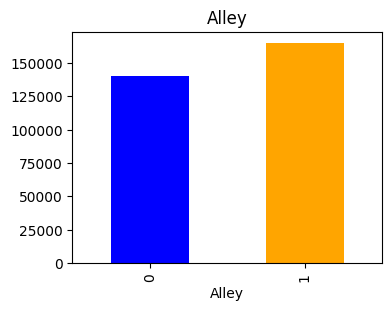

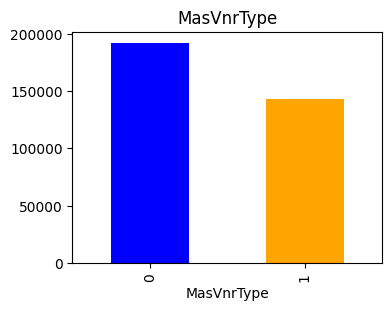

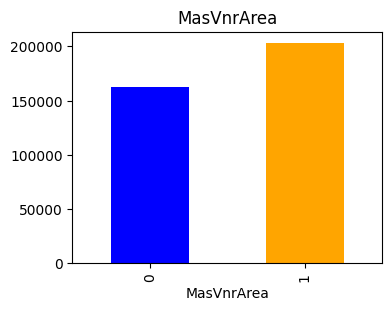

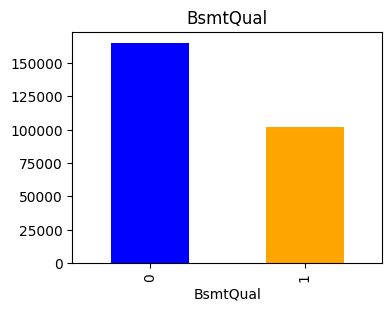

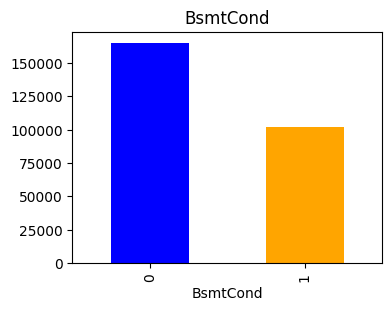

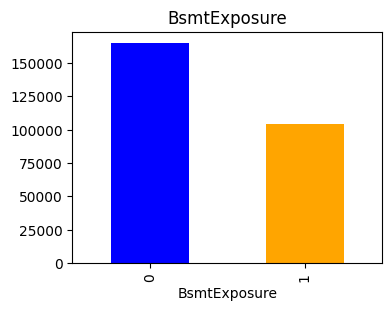

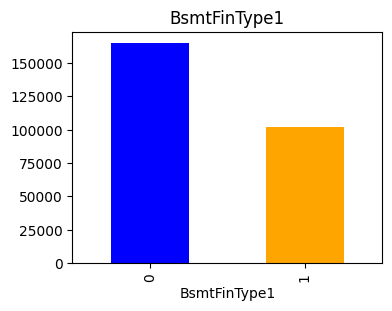

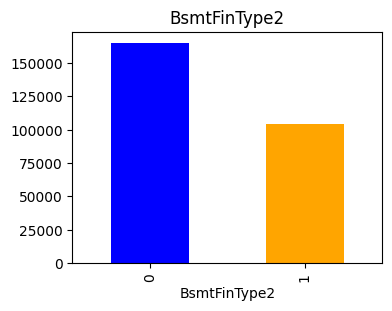

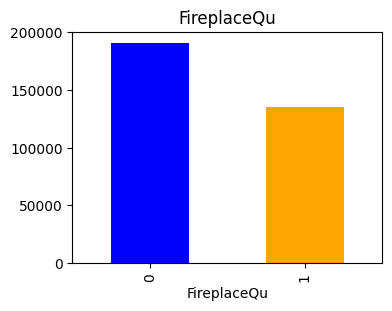

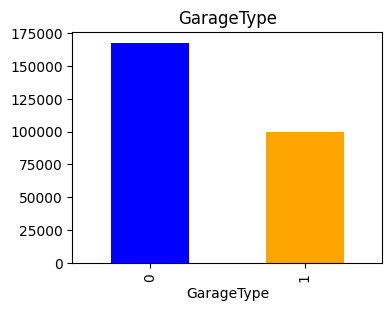

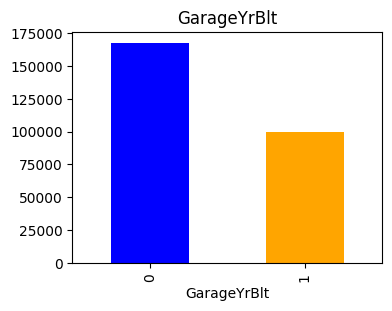

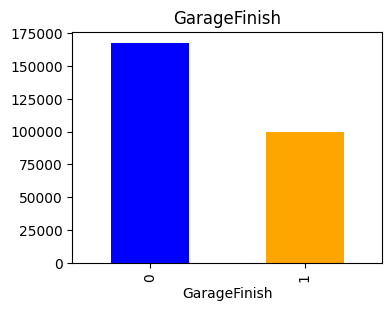

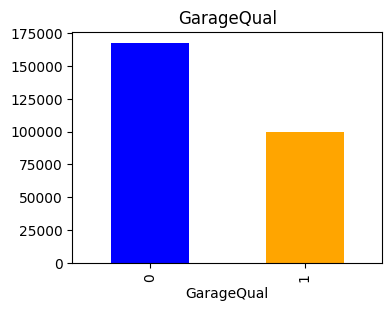

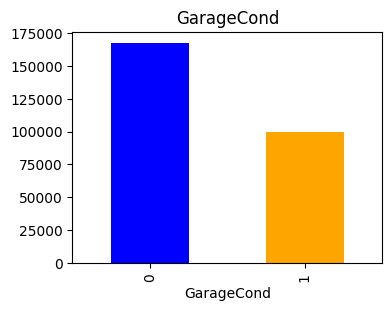

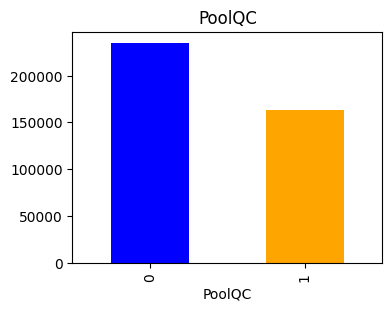

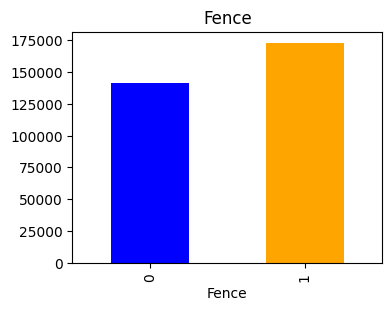

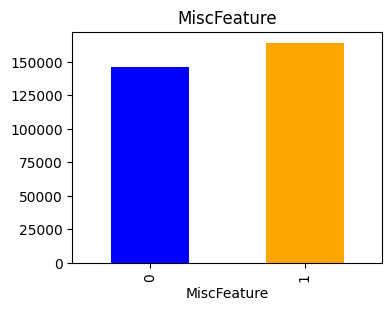

In [17]:
# Set the figure size for the bar plots
mpl.rcParams["figure.figsize"] = (4, 3)

# Define colors for 0 and 1 values
colors = ["blue", "orange"]

# For each feature with missing values, create bar plots to compare the median SalePrice
# for observations with missing values and observations with the feature present.

for feature in features_with_na:
    # Create a copy of the dataset to avoid modifying the original
    data = dataset.copy()
    
    # Create a binary variable indicating whether the observation was missing (1) or not (0) for the current feature
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Calculate and plot the median SalePrice for observations with missing values and observations with the feature present
    data.groupby(feature)["SalePrice"].median().plot.bar(color=colors)
    plt.title(feature)
    plt.show()

These visualizations provide a starting point for understanding the effects of missing values on 'SalePrice'. The median 'SalePrice' of observations with missing values for an attribute is significantly different from those with non-missing values, this may indicate that the missing values may have a significant impact on 'SalePrice'. Therefore, to better understand the reason for missing data, the domain information of each column containing missing data was examined.

In [18]:
# Examine the mean and median values of LotFrontage
LotFrontage_mean = dataset["LotFrontage"].mean()
LotFrontage_median = dataset["LotFrontage"].median()
print("LotFrontage Mean: ", LotFrontage_mean)
print("LotFrontage Median: ", LotFrontage_median)

# Since the mean and median values of LotFrontage are very close to each other, 
# it does not matter which one fills in the missing values in this field.

LotFrontage Mean:  70.04995836802665
LotFrontage Median:  69.0


In [19]:
# Function to fill missing values in specified columns of the DataFrame "dataset"
def fill_missing_values(dataset):
    # Fill missing values some categorical columns with "NA" (Columns that do not have that feature)
    dataset["Fence"] = dataset["Fence"].fillna("NA")
    dataset["FireplaceQu"] = dataset["FireplaceQu"].fillna("NA")
    dataset["PoolQC"] = dataset["PoolQC"].fillna("NA")
    dataset["MiscFeature"] = dataset["MiscFeature"].fillna("NA")
    dataset["Alley"] = dataset["Alley"].fillna("NA")
    dataset["MasVnrType"] = dataset["MasVnrType"].fillna("NA")

    # Fill missing values in specified garage-related columns with "NA"
    garage_columns = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
    for column in garage_columns:
        dataset[column] = dataset[column].fillna("NA")

    # Fill missing values in specified basement-related columns with "NA"
    basement_columns = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
    for column in basement_columns:
        dataset[column] = dataset[column].fillna("NA")    

    # Fill missing values in the "LotFrontage" column (continuous variable) with the median value
    Lotfrontage_series = dataset["LotFrontage"]
    median_value = Lotfrontage_series.median()
    dataset["LotFrontage"].fillna(median_value, inplace=True)

    # Fill missing values in the "Electrical" column with the mode value (only 1 value)
    dataset["Electrical"] = dataset["Electrical"].fillna(dataset["Electrical"].mode()[0])

    # Fill missing values in the "GarageYrBlt" column with 0
    dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(0)

    # Fill missing values in the "MasVnrArea" column with 0
    dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(0)

    # Return the DataFrame with filled missing values
    return dataset

In [20]:
dataset = fill_missing_values(dataset)

In [21]:
# Display information about missing values in the DataFrame "dataset" after the missing values have been filled.
# This step is to verify that the missing values have been successfully addressed.
missing_data(dataset, 30)

# Missing values have been filled.

               Missing Values  Missing Values Percentage  Unique Values
PavedDrive                  0                        0.0              3
WoodDeckSF                  0                        0.0            274
OpenPorchSF                 0                        0.0            202
EnclosedPorch               0                        0.0            120
3SsnPorch                   0                        0.0             20
ScreenPorch                 0                        0.0             76
PoolArea                    0                        0.0              8
PoolQC                      0                        0.0              4
Utilities                   0                        0.0              2
LotConfig                   0                        0.0              5
LandSlope                   0                        0.0              3
Neighborhood                0                        0.0             25
Condition1                  0                        0.0        

## 3. Handling Outliers

In [22]:
# Create a list of numerical variables § year variables § discrete variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if "Yr" in feature or "Year" in feature]
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique()) < 25 and feature not in year_feature + ['Id']]

# Print the number of numerical variables
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  34


In [23]:
# Identify continuous numerical features by excluding discrete, year-related, and 'Id' variables
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id']]

# Print the count of continuous features
print("Continuous Feature Count: {}".format(len(continuous_feature)))

Continuous Feature Count: 16


In [24]:
outliers = []

# Iterate through continuous features
for feature in continuous_feature:
    # Calculate the z-score for the current feature
    z = np.abs(stats.zscore(dataset[feature]))
    
    # Set a threshold for outlier detection
    threshold = 3
    
    # Print the indices where z-score is greater than the threshold
    print("Outliers for feature '{}':".format(feature))
    print(np.where(z > threshold))
    print("\n")

Outliers for feature 'LotFrontage':
(array([ 171,  197,  231,  277,  313,  446,  807,  909,  934, 1107, 1127,
       1173, 1182, 1211, 1298, 1337]),)


Outliers for feature 'LotArea':
(array([  53,  249,  313,  335,  384,  451,  457,  661,  706,  769,  848,
       1298, 1396]),)


Outliers for feature 'MasVnrArea':
(array([  37,   58,   70,  105,  115,  161,  169,  178,  224,  297,  349,
        403,  477,  517,  523,  654,  691,  718,  755,  763,  798,  808,
        825,  898,  981, 1111, 1169, 1228, 1289, 1298, 1373, 1417]),)


Outliers for feature 'BsmtFinSF1':
(array([  70,  178,  523,  898, 1182, 1298]),)


Outliers for feature 'BsmtFinSF2':
(array([  24,   52,  113,  116,  153,  166,  233,  253,  260,  263,  271,
        273,  313,  322,  355,  414,  440,  446,  470,  493,  542,  548,
        577,  586,  599,  666,  697,  764,  785,  828,  842,  854,  888,
        918,  923,  924, 1040, 1059, 1077, 1152, 1220, 1253, 1299, 1308,
       1320, 1369, 1387, 1418, 1445, 1458]),)


Outl

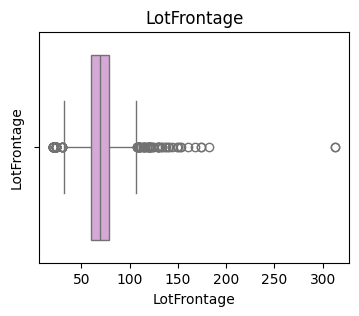

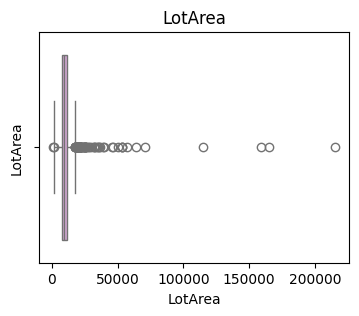

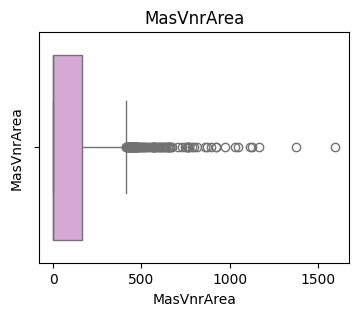

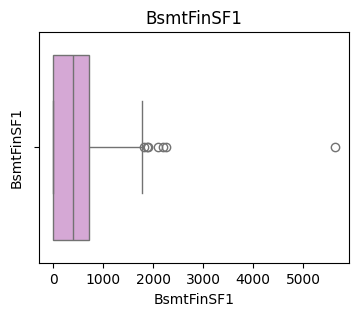

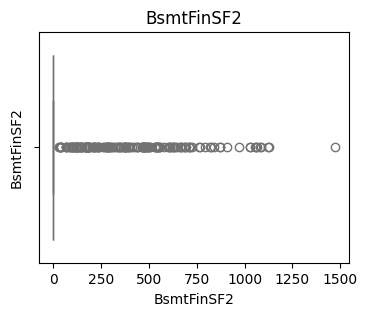

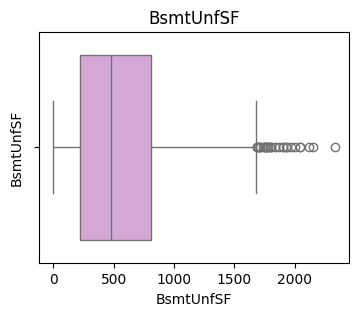

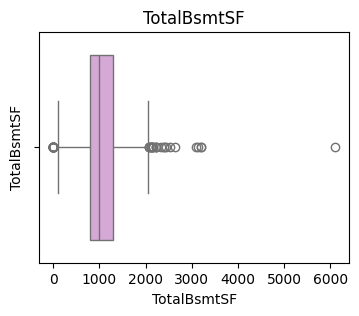

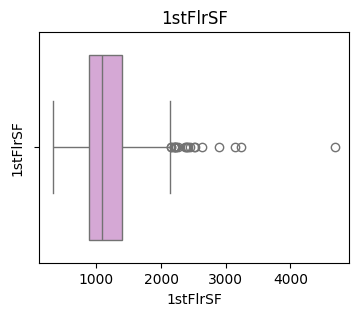

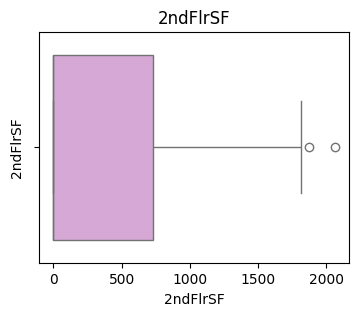

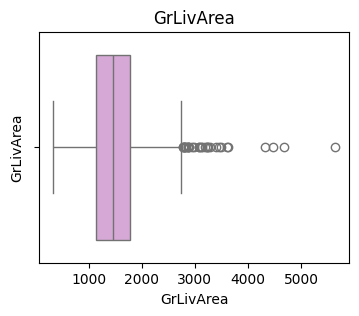

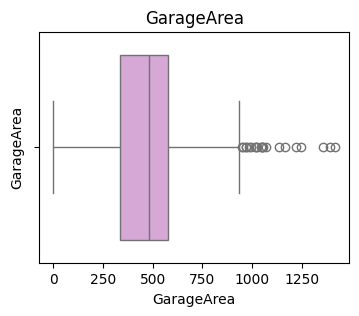

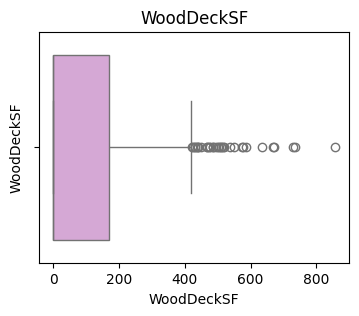

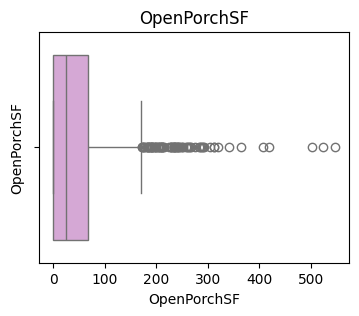

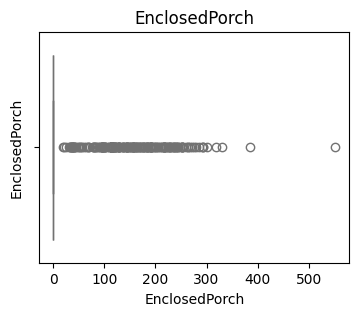

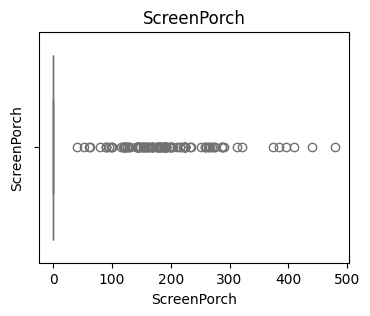

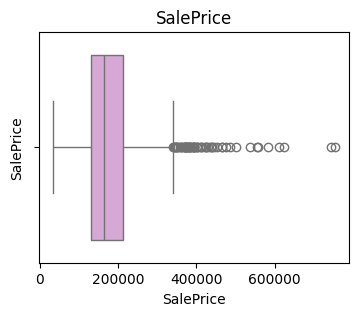

In [25]:
# Visualize the data using boxplots

for feature in continuous_feature:
    # Create a copy of the dataset to avoid modifying the original
    data = dataset.copy()

    # Create a boxplot for the transformed feature
    sns.boxplot(data[feature], color="plum", orient='h')
        
    # Set the label for the y-axis
    plt.ylabel(feature)
        
    # Set the title of the plot
    plt.title(feature)
        
    # Display the boxplot
    plt.show()

Since most values were not clearly visible when the box plot was made, the box plots were examined again by taking the logarithmic function.

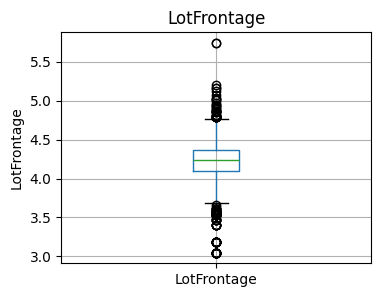

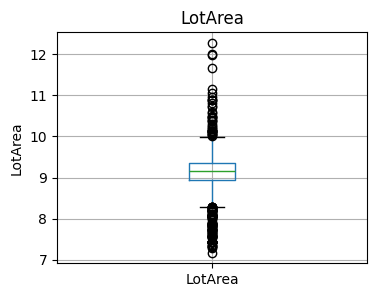

Skipped! Feature 'MasVnrArea' contains zero.
Skipped! Feature 'BsmtFinSF1' contains zero.
Skipped! Feature 'BsmtFinSF2' contains zero.
Skipped! Feature 'BsmtUnfSF' contains zero.
Skipped! Feature 'TotalBsmtSF' contains zero.


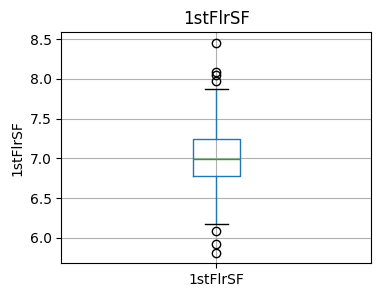

Skipped! Feature '2ndFlrSF' contains zero.


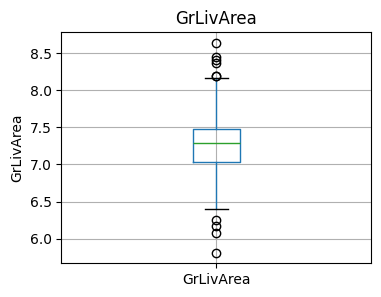

Skipped! Feature 'GarageArea' contains zero.
Skipped! Feature 'WoodDeckSF' contains zero.
Skipped! Feature 'OpenPorchSF' contains zero.
Skipped! Feature 'EnclosedPorch' contains zero.
Skipped! Feature 'ScreenPorch' contains zero.


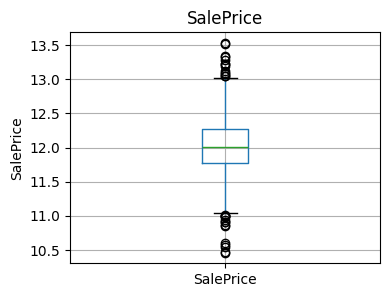

In [26]:
# Iterate through each continuous feature in the dataset
for feature in continuous_feature:
    
    # Create a copy of the original dataset
    data = dataset.copy()
    
    # Check if the value 0 is present in the unique values of the current feature
    if 0 in data[feature].unique():
        # If 0 is present, do nothing and move to the next feature
        pass
        print("Skipped! Feature '{}' contains zero.".format(feature))
    else:
        # If 0 is not present, apply the natural logarithm (np.log) transformation to the feature
        data[feature] = np.log(data[feature])
        
        # Create a boxplot to visualize the distribution of the transformed feature
        data.boxplot(column=feature)
        
        # Set labels for the y-axis and title of the plot
        plt.ylabel(feature)
        plt.title(feature)
        
        # Display the plot
        plt.show()


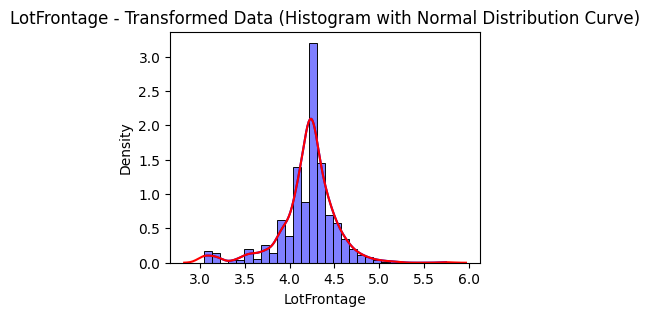

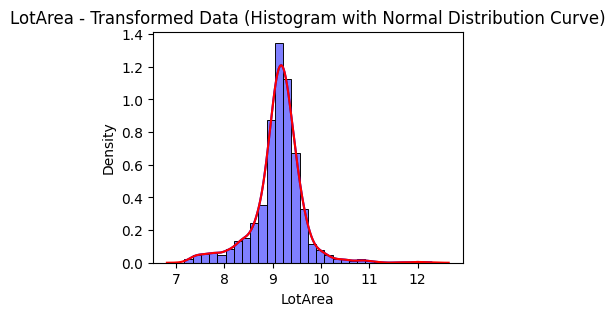

Skipped! Feature 'MasVnrArea' contains zero.
Skipped! Feature 'BsmtFinSF1' contains zero.
Skipped! Feature 'BsmtFinSF2' contains zero.
Skipped! Feature 'BsmtUnfSF' contains zero.
Skipped! Feature 'TotalBsmtSF' contains zero.


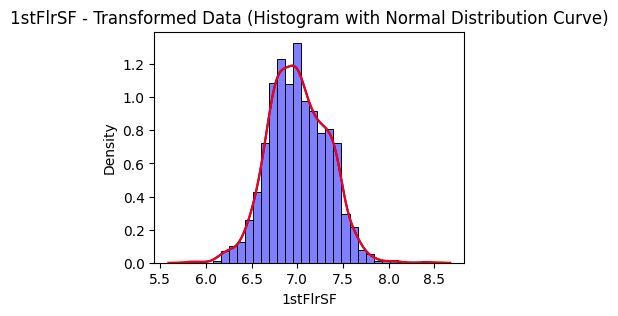

Skipped! Feature '2ndFlrSF' contains zero.


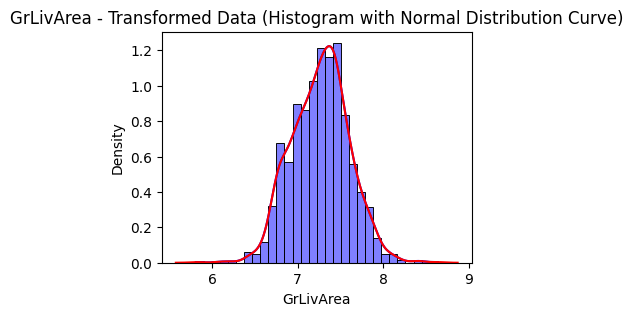

Skipped! Feature 'GarageArea' contains zero.
Skipped! Feature 'WoodDeckSF' contains zero.
Skipped! Feature 'OpenPorchSF' contains zero.
Skipped! Feature 'EnclosedPorch' contains zero.
Skipped! Feature 'ScreenPorch' contains zero.


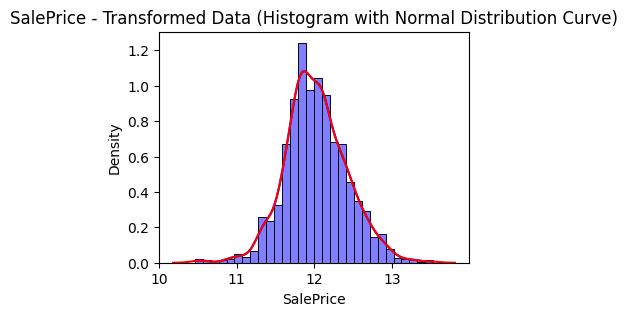

In [27]:
# In order to decide the method of handling outliers, normal distribution curve is also observed.
for feature in continuous_feature:
    # Create a copy of the dataset to avoid modifying the original
    data = dataset.copy()
    
    # Check if the feature contains zero
    if 0 in data[feature].unique():
        pass
        print("Skipped! Feature '{}' contains zero.".format(feature))
    else:
        # Apply the natural logarithm transformation
        data[feature] = np.log(data[feature])

        # Plot normal distribution curve
        sns.histplot(data[feature], kde=True, bins=30, color='blue', stat='density')
        sns.kdeplot(data[feature], color='red')
        plt.title(f'{feature} - Transformed Data (Histogram with Normal Distribution Curve)')

        # Display the plots
        plt.show()


ChatGPT(:D) suggests that in cases where a deviation from a normal or symmetrical distribution is identified, employing the filling with mean method for outliers may be appropriate. However, if very high or low values, single outliers, or one-way outliers are detected, it is recommended to address these outliers using the capping method.

When analyzing both the boxplot and histogram with a normal distribution curve concurrently, the information provided above guided the identification of 
appropriate methods, such as capping and filling with mean.

Filling with mean method was applied in line with analyzing both the boxplot and histogram together.
Filling w/ Mean: LotFrontage, LotArea, 1stFlrSF, GrLivArea

The variable 'SalePrice' was not included in the outlier analysis because it is the target variable.

In [28]:
# Filling w/ Mean - LotFrontage

# Extract the "LotFrontage" column from the dataset
dataset_LotFrontage = dataset["LotFrontage"]

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
LotFrontage_Q1 = dataset_LotFrontage.quantile(0.25)
LotFrontage_Q3 = dataset_LotFrontage.quantile(0.75)
LotFrontage_IQR = LotFrontage_Q3 - LotFrontage_Q1

# Display quartile and IQR information
print("LotFrontage Q1: ", LotFrontage_Q1)
print("LotFrontage Q3: ", LotFrontage_Q3)
print("LotFrontage IQR: ", LotFrontage_IQR)

# Calculate lower and upper boundaries
LotFrontage_lwr_boundary = LotFrontage_Q1 - 1.5 * LotFrontage_IQR
LotFrontage_upr_boundary = LotFrontage_Q3 + 1.5 * LotFrontage_IQR

# Display the calculated boundaries
print("LotFrontage Lower Boundary: ", LotFrontage_lwr_boundary)
print("LotFrontage Upper Boundary: ", LotFrontage_upr_boundary)

LotFrontage Q1:  60.0
LotFrontage Q3:  79.0
LotFrontage IQR:  19.0
LotFrontage Lower Boundary:  31.5
LotFrontage Upper Boundary:  107.5


In [29]:
# Identify outliers for LotFrontage
outlier_LotFrontage = (dataset_LotFrontage < LotFrontage_lwr_boundary) | (dataset_LotFrontage > LotFrontage_upr_boundary)

#dataset_LotFrontage[outlier_LotFrontage]

In [30]:
# Calculate the mean of LotFrontage
lot_frontage_mean = dataset_LotFrontage.mean()
print("LotFrontage Mean: ", lot_frontage_mean)

# Replace outliers in LotFrontage with the mean value
dataset_LotFrontage[outlier_LotFrontage] = dataset_LotFrontage.mean()


LotFrontage Mean:  69.86369863013698


In [31]:
dataset_LotFrontage[outlier_LotFrontage]

25      69.863699
35      69.863699
36      69.863699
41      69.863699
52      69.863699
56      69.863699
75      69.863699
85      69.863699
86      69.863699
145     69.863699
150     69.863699
159     69.863699
161     69.863699
171     69.863699
193     69.863699
195     69.863699
197     69.863699
225     69.863699
227     69.863699
231     69.863699
232     69.863699
235     69.863699
260     69.863699
264     69.863699
276     69.863699
277     69.863699
290     69.863699
302     69.863699
306     69.863699
313     69.863699
320     69.863699
363     69.863699
408     69.863699
429     69.863699
430     69.863699
432     69.863699
434     69.863699
446     69.863699
473     69.863699
489     69.863699
500     69.863699
504     69.863699
523     69.863699
599     69.863699
603     69.863699
614     69.863699
649     69.863699
655     69.863699
662     69.863699
673     69.863699
675     69.863699
758     69.863699
764     69.863699
774     69.863699
807     69.863699
825     69

In [32]:
# Filling w/ Mean - LotArea

# Extract the "LotArea" column from the dataset
dataset_LotArea = dataset["LotArea"]

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
LotArea_Q1 = dataset_LotArea.quantile(0.25)
LotArea_Q3 = dataset_LotArea.quantile(0.75)
LotArea_IQR = LotArea_Q3 - LotArea_Q1

# Display quartile and IQR information
print("LotArea Q1: ", LotArea_Q1)
print("LotArea Q3: ", LotArea_Q3)
print("LotArea IQR: ", LotArea_IQR)

# Calculate lower and upper boundaries 
LotArea_lwr_boundary = LotArea_Q1 - 1.5 * LotArea_IQR
LotArea_upr_boundary = LotArea_Q3 + 1.5 * LotArea_IQR

# Display the calculated boundaries
print("LotArea Lower Boundary: ", LotArea_lwr_boundary)
print("LotArea Upper Boundary: ", LotArea_upr_boundary)

LotArea Q1:  7553.5
LotArea Q3:  11601.5
LotArea IQR:  4048.0
LotArea Lower Boundary:  1481.5
LotArea Upper Boundary:  17673.5


In [33]:
# Identify outliers for LotArea
outlier_LotArea = (dataset_LotArea < LotArea_lwr_boundary) | (dataset_LotArea > LotArea_upr_boundary)

#dataset_LotArea[outlier_LotArea]

In [34]:
# Calculate the mean of LotArea
LotArea_mean = dataset_LotArea.mean()
print("LotArea Mean: ", LotArea_mean)

# Replace outliers in LotArea with the mean value
dataset_LotArea[outlier_LotArea] = dataset_LotArea.mean()

LotArea Mean:  10516.828082191782


In [35]:
dataset_LotArea[outlier_LotArea]

53      10516.828082
66      10516.828082
113     10516.828082
120     10516.828082
159     10516.828082
171     10516.828082
185     10516.828082
197     10516.828082
249     10516.828082
260     10516.828082
271     10516.828082
277     10516.828082
304     10516.828082
313     10516.828082
335     10516.828082
349     10516.828082
364     10516.828082
384     10516.828082
411     10516.828082
417     10516.828082
422     10516.828082
451     10516.828082
457     10516.828082
523     10516.828082
529     10516.828082
558     10516.828082
563     10516.828082
588     10516.828082
661     10516.828082
664     10516.828082
666     10516.828082
691     10516.828082
692     10516.828082
706     10516.828082
726     10516.828082
769     10516.828082
807     10516.828082
828     10516.828082
848     10516.828082
854     10516.828082
876     10516.828082
934     10516.828082
939     10516.828082
943     10516.828082
956     10516.828082
1010    10516.828082
1039    10516.828082
1048    10516

In [36]:
# Filling w/ Mean - 1stFlrSF 

# Extract the "1stFlrSF" column from the dataset
dataset_1stFlrSF = dataset["1stFlrSF"]

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
stFlrSF_Q1 = dataset_1stFlrSF.quantile(0.25)
stFlrSF_Q3 = dataset_1stFlrSF.quantile(0.75)
stFlrSF_IQR = stFlrSF_Q3 - stFlrSF_Q1

# Display quartile and IQR information
print("1stFlrSF Q1: ", stFlrSF_Q1)
print("1stFlrSF Q3: ", stFlrSF_Q3)
print("1stFlrSF IQR: ", stFlrSF_IQR)

# Calculate lower and upper boundaries 
stFlrSF_lwr_boundary = stFlrSF_Q1 - 1.5 * stFlrSF_IQR
stFlrSF_upr_boundary = stFlrSF_Q3 + 1.5 * stFlrSF_IQR

# Display the calculated boundaries
print("1stFlrSF Lower Boundary: ", stFlrSF_lwr_boundary)
print("1stFlrSF Upper Boundary: ", stFlrSF_upr_boundary)

1stFlrSF Q1:  882.0
1stFlrSF Q3:  1391.25
1stFlrSF IQR:  509.25
1stFlrSF Lower Boundary:  118.125
1stFlrSF Upper Boundary:  2155.125


In [37]:
# Identify outliers for 1stFlrSF
outlier_1stFlrSF = (dataset_1stFlrSF < stFlrSF_lwr_boundary) | (dataset_1stFlrSF > stFlrSF_upr_boundary)

#dataset_1stFlrSF[outlier_1stFlrSF]

In [38]:
# Calculate the mean of 1stFlrSF
stFlrSF_mean = dataset_1stFlrSF.mean()
print("1stFlrSF Mean: ", stFlrSF_mean)

# Replace outliers in 1stFlrSF with the mean value
dataset_1stFlrSF[outlier_1stFlrSF] = dataset_1stFlrSF.mean()

1stFlrSF Mean:  1162.626712328767


In [39]:
dataset_1stFlrSF[outlier_1stFlrSF]

66      1162.626712
70      1162.626712
113     1162.626712
175     1162.626712
178     1162.626712
224     1162.626712
440     1162.626712
496     1162.626712
523     1162.626712
529     1162.626712
691     1162.626712
888     1162.626712
898     1162.626712
1024    1162.626712
1044    1162.626712
1182    1162.626712
1205    1162.626712
1298    1162.626712
1346    1162.626712
1373    1162.626712
Name: 1stFlrSF, dtype: float64

In [40]:
# Filling w/ Mean - GrLivArea

# Extract the "GrLivArea" column from the dataset
dataset_GrLivArea = dataset["GrLivArea"]

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
GrLivArea_Q1 = dataset_GrLivArea.quantile(0.25)
GrLivArea_Q3 = dataset_GrLivArea.quantile(0.75)
GrLivArea_IQR = GrLivArea_Q3 - GrLivArea_Q1

# Display quartile and IQR information
print("GrLivArea Q1: ", GrLivArea_Q1)
print("GrLivArea Q3: ", GrLivArea_Q3)
print("GrLivArea IQR: ", GrLivArea_IQR)

# Calculate lower and upper boundaries 
GrLivArea_lwr_boundary = GrLivArea_Q1 - 1.5 * GrLivArea_IQR
GrLivArea_upr_boundary = GrLivArea_Q3 + 1.5 * GrLivArea_IQR

# Display the calculated boundaries
print("GrLivArea Lower Boundary: ", GrLivArea_lwr_boundary)
print("GrLivArea Upper Boundary: ", GrLivArea_upr_boundary)

GrLivArea Q1:  1129.5
GrLivArea Q3:  1776.75
GrLivArea IQR:  647.25
GrLivArea Lower Boundary:  158.625
GrLivArea Upper Boundary:  2747.625


In [41]:
# Identify outliers for GrLivArea
outlier_GrLivArea = (dataset_GrLivArea < GrLivArea_lwr_boundary) | (dataset_GrLivArea > GrLivArea_upr_boundary)

#dataset_GrLivArea[outlier_GrLivArea]

In [42]:
# Calculate the mean of GrLivArea
GrLivArea_mean = dataset_GrLivArea.mean()
print("GrLivArea Mean: ", GrLivArea_mean)

# Replace outliers in GrLivArea with the mean value
dataset_GrLivArea[outlier_GrLivArea] = dataset_GrLivArea.mean()

GrLivArea Mean:  1515.463698630137


In [43]:
dataset_GrLivArea[outlier_GrLivArea]

58      1515.463699
118     1515.463699
185     1515.463699
197     1515.463699
231     1515.463699
304     1515.463699
324     1515.463699
496     1515.463699
523     1515.463699
583     1515.463699
608     1515.463699
635     1515.463699
691     1515.463699
769     1515.463699
798     1515.463699
803     1515.463699
961     1515.463699
1024    1515.463699
1031    1515.463699
1046    1515.463699
1142    1515.463699
1169    1515.463699
1173    1515.463699
1175    1515.463699
1182    1515.463699
1268    1515.463699
1298    1515.463699
1312    1515.463699
1328    1515.463699
1353    1515.463699
1386    1515.463699
Name: GrLivArea, dtype: float64

## 4. Examining Variables

All data were examined with their explanations from the data description file.

### 4.1. Numerical Variables

In [44]:
# Create a list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

# Print the number of numerical variables
print('Number of numerical variables: ', len(numerical_features))

# Visualize the first few rows of the numerical variables in the DataFrame
dataset[numerical_features].head()


Number of numerical variables:  34


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450.0,2003,2003,196.0,706,0,150,856,856.0,854,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600.0,1976,1976,0.0,978,0,284,1262,1262.0,0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250.0,2001,2002,162.0,486,0,434,920,920.0,866,0,1786.0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550.0,1915,1970,0.0,216,0,540,756,961.0,756,0,1717.0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260.0,2000,2000,350.0,655,0,490,1145,1145.0,1053,0,2198.0,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### 4.1.1. Temporal Variables(Ex: Datetime Variables)

In [45]:
# Create a list of variables that contain year information
year_feature = [feature for feature in numerical_features if "Yr" in feature or "Year" in feature]

# Display the list of variables with year information
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [46]:
# Explore the unique values in the year-related variables
for feature in year_feature:
    print("{}: {}".format(feature, dataset[feature].unique()))

YearBuilt: [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd: [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 20

Text(0.5, 1.0, 'House Price vs Year Sold')

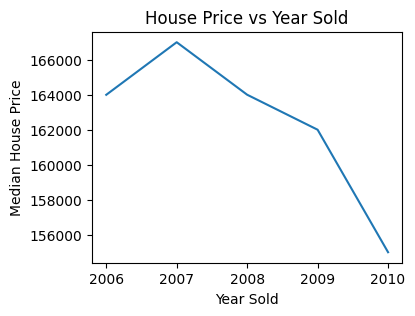

In [47]:
# Analyze the Temporal Datetime Variables
# Check whether there is a relation between the year the house is sold and the sales price

# Group the dataset by the year the house is sold and plot the median sales price
dataset.groupby("YrSold")["SalePrice"].median().plot()

# Set the labels for the x and y axes
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")

# Set the title of the plot
plt.title("House Price vs Year Sold")

In [48]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

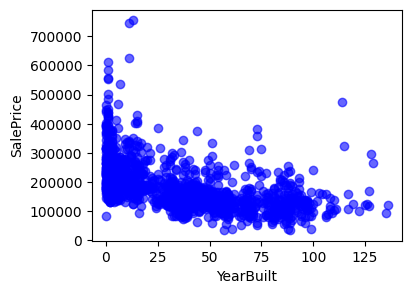

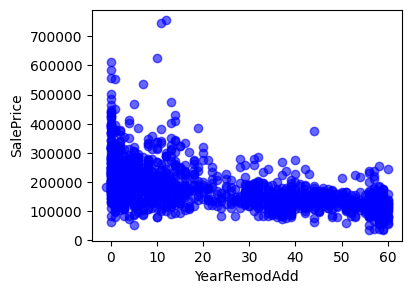

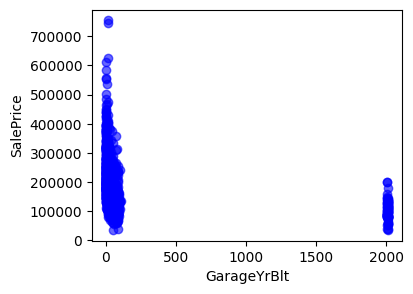

In [49]:
# Examine the impact of the temporal variables (excluding 'YrSold') on SalePrice.
# For each year-related feature, Calculate the difference between the variable's value and the year the house was sold.
# Subsequently, scatter plots are created to visualize the relationship between these differences and SalePrice.

for feature in year_feature:
    # Exclude 'YrSold' from the comparison
    if feature != "YrSold":
        data = dataset.copy()
        
        # Capture the difference between the year variable and the year the house was sold
        data[feature] = data["YrSold"] - data[feature]

        # Create a scatter plot to visualize the relationship with SalePrice
        plt.scatter(data[feature], data["SalePrice"], color='blue', alpha=0.6) # Set color and transparency
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

### 4.1.2 Discrete Variables and Continous Variables

##### 4.1.2.1. Discrete Variables

In [50]:
# Identify discrete numerical variables with fewer than 25 unique values
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique()) < 25 and feature not in year_feature + ['Id']]

# Print the count of discrete variables
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [51]:
discrete_feature

['LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [52]:
dataset[discrete_feature].head()

,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,0,1,0,2,1,4,1,9,1,3,0,0,0,12


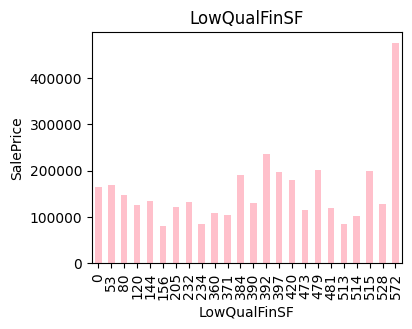

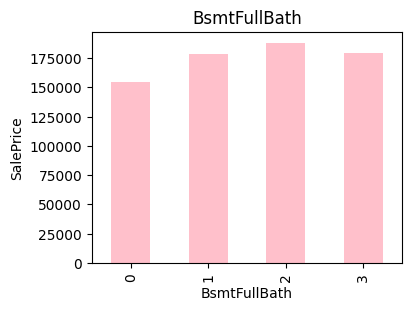

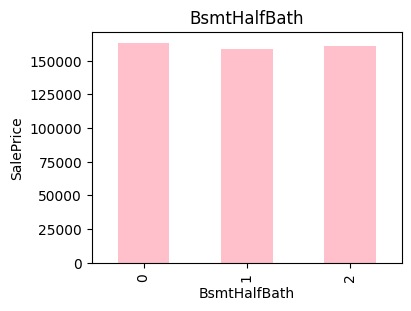

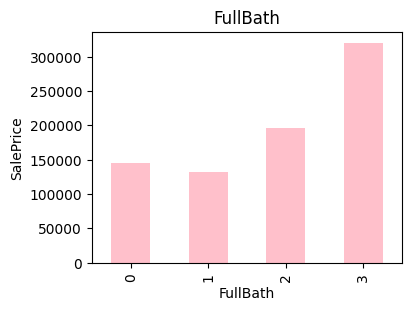

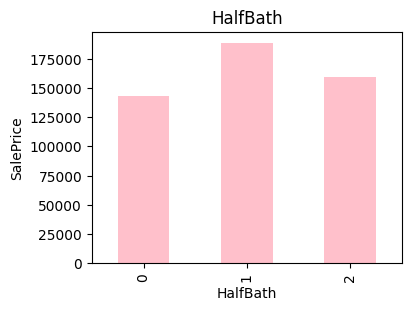

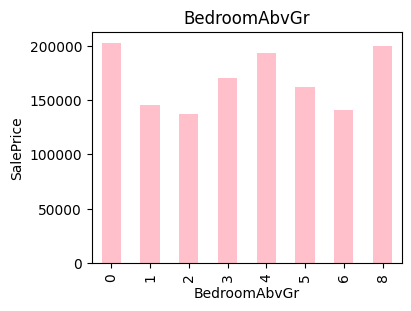

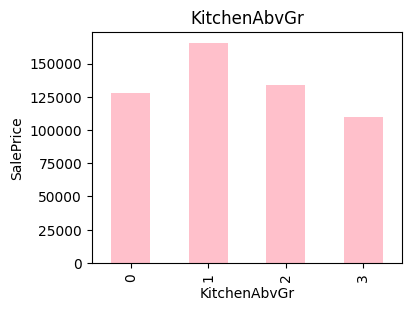

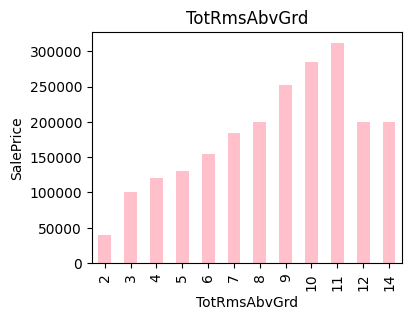

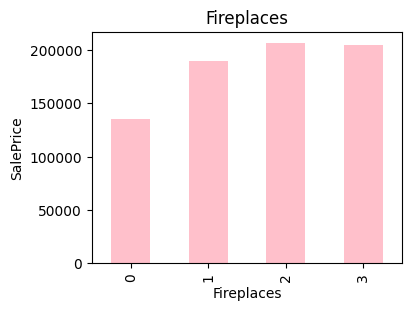

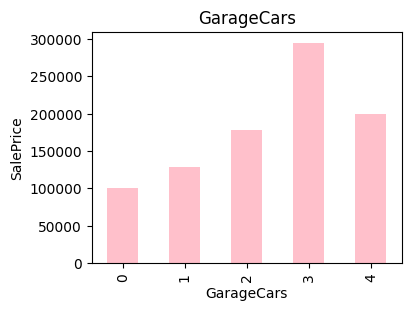

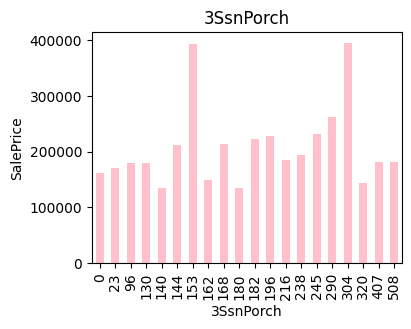

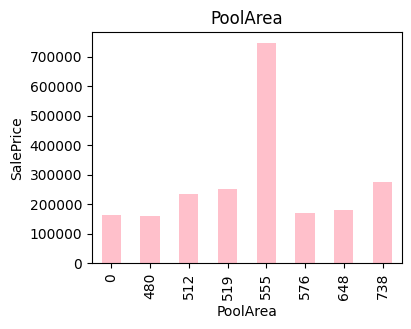

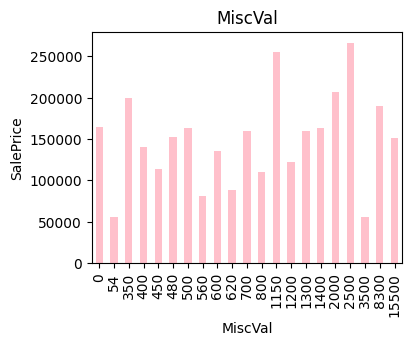

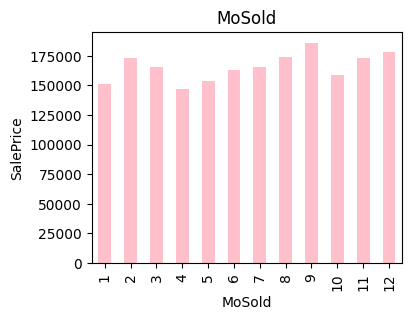

In [53]:
# Find the relationship between discrete numerical features and SalePrice

for feature in discrete_feature:
    # Create a copy of the dataset to avoid modifying the original
    data = dataset.copy()
    
    # Group the data by the discrete feature and plot the median SalePrice
    data.groupby(feature)["SalePrice"].median().plot.bar(color="pink")
    
    # Set the labels for the x and y axes
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    
    # Set the title of the plot
    plt.title(feature)
    
    # Display the plot
    plt.show()


##### 4.1.2.2. Continuous Variables

In addition to the continuous numerical variables listed below, the categories that are detected within discrete values but are continuous variable are:

'LowQualFinSF'

'3SsnPorch'

'PoolArea' 

Note: I couldn't figure out how to add these to the continuous variable.


In [54]:
# Identify continuous numerical features by excluding discrete, year-related, and 'Id' variables
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id']]

# Print the count of continuous features
print("Continuous Feature Count: {}".format(len(continuous_feature)))

Continuous Feature Count: 16


In [55]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

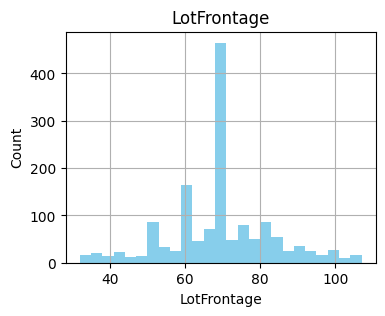

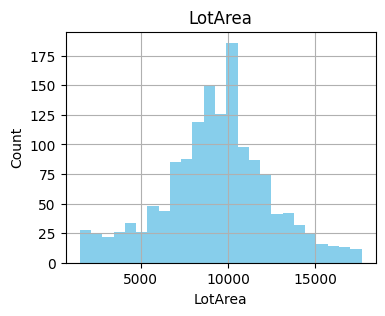

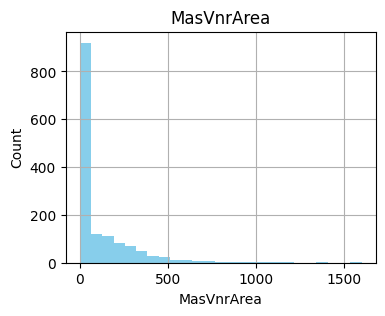

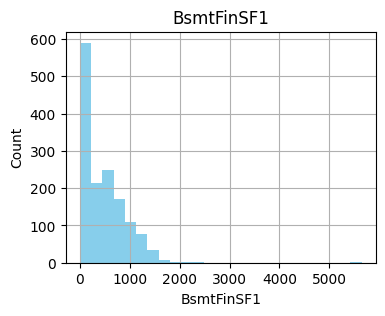

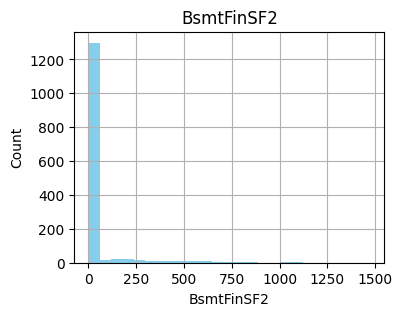

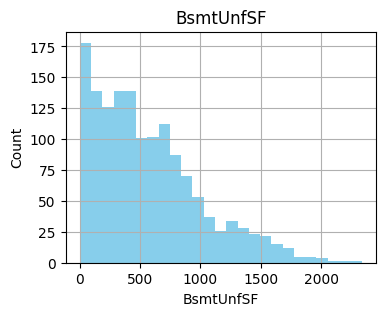

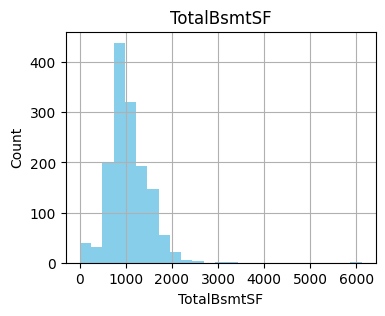

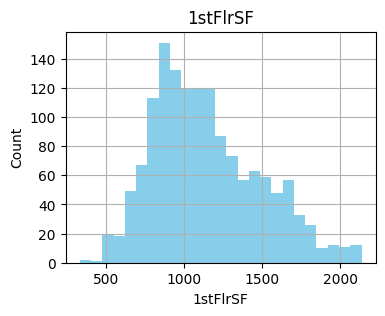

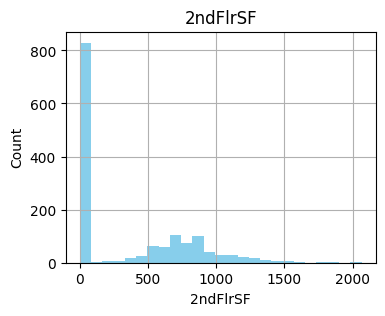

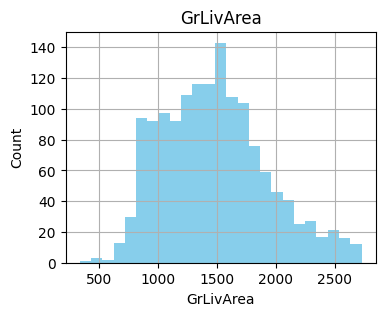

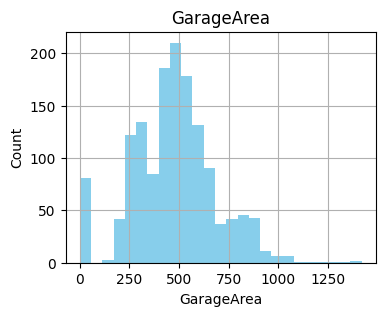

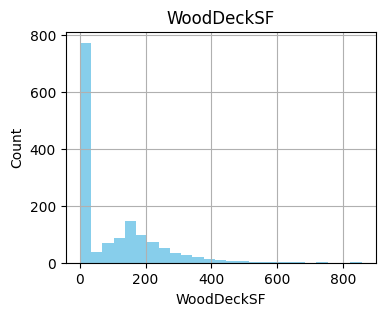

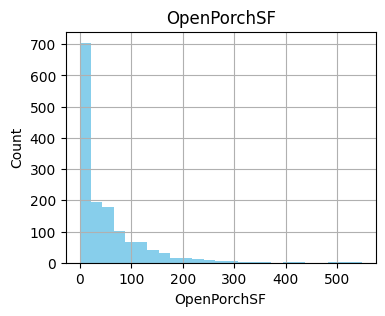

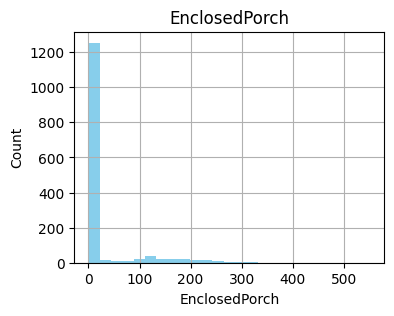

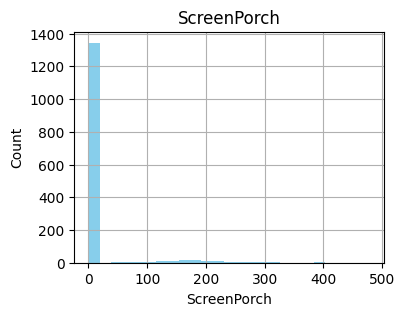

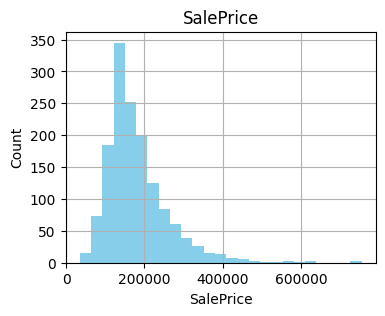

In [56]:
# Analyze the continuous values by creating histograms to understand their distribution

for feature in continuous_feature:
    # Create a copy of the dataset to avoid modifying the original
    data = dataset.copy()
    
    # Plot a histogram for the continuous feature with 25 bins
    data[feature].hist(bins=25, color="skyblue")
    
    # Set the labels for the x and y axes
    plt.xlabel(feature)
    plt.ylabel("Count")
    
    # Set the title of the plot
    plt.title(feature)
    
    # Display the histogram
    plt.show()


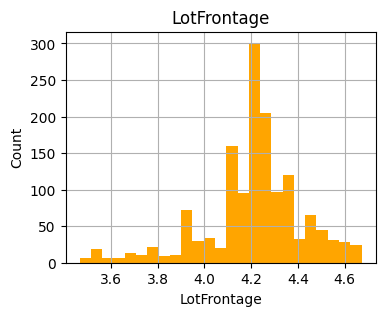

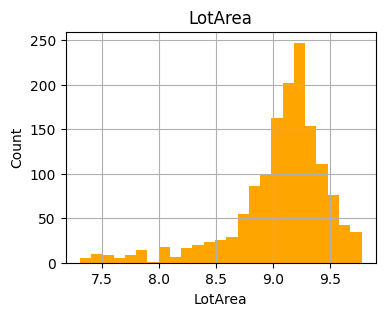

Skipped! Feature 'MasVnrArea' contains zero.
Skipped! Feature 'BsmtFinSF1' contains zero.
Skipped! Feature 'BsmtFinSF2' contains zero.
Skipped! Feature 'BsmtUnfSF' contains zero.
Skipped! Feature 'TotalBsmtSF' contains zero.


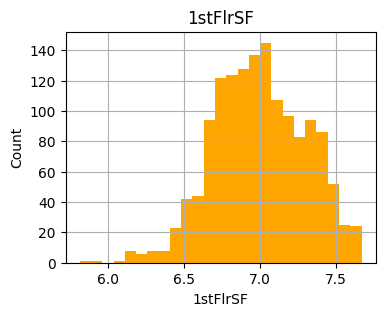

Skipped! Feature '2ndFlrSF' contains zero.


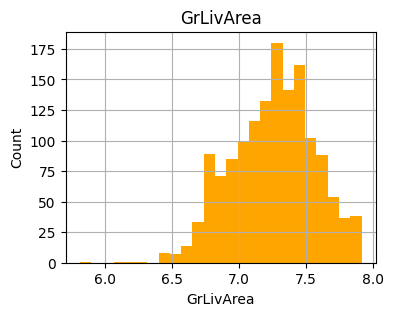

Skipped! Feature 'GarageArea' contains zero.
Skipped! Feature 'WoodDeckSF' contains zero.
Skipped! Feature 'OpenPorchSF' contains zero.
Skipped! Feature 'EnclosedPorch' contains zero.
Skipped! Feature 'ScreenPorch' contains zero.


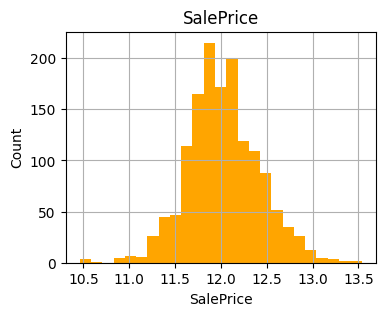

In [57]:
# For each continuous feature, apply the natural logarithm transformation if the feature contains non-zero values

for feature in continuous_feature:
    # Create a copy of the dataset to avoid modifying the original
    data = dataset.copy()
    
    # Check if the feature contains zero
    if 0 in data[feature].unique():
        pass
        print("Skipped! Feature '{}' contains zero.".format(feature))
    else:
        # Apply the natural logarithm transformation
        data[feature] = np.log(data[feature])
        
        # Plot a histogram for the transformed feature with 25 bins
        data[feature].hist(bins=25, color="orange")
        
        # Set the labels for the x and y axes
        plt.xlabel(feature)
        plt.ylabel("Count")
        
        # Set the title of the plot
        plt.title(feature)
        
        # Display the histogram
        plt.show()


### 4.2. Categorical Variables

In [58]:
# dtypes
# 'b'       boolean
# 'i'       (signed) integer
# 'u'       unsigned integer
# 'f'       floating-point
# 'c'       complex-floating point
# 'O'       (Python) objects

# 'S', 'a'  (byte-)string
# 'U'       Unicode
# 'V'       raw data (void) 

In [59]:
# Identify categorical features in the dataset
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == "O"]

# Print the count of categorical features
print("Continuous Feature Count: {}".format(len(categorical_features)))

Continuous Feature Count: 46


In [60]:
# Display the list of categorical features
categorical_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [61]:
dataset[categorical_features].head()


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,NA,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,NA,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [62]:
# Print the number of unique categories for each categorical feature in the dataset
for feature in categorical_features:
    print("Number of unique categories in variable '{}': {}".format(feature, len(dataset[feature].unique())))

Number of unique categories in variable 'MSSubClass': 15
Number of unique categories in variable 'MSZoning': 5
Number of unique categories in variable 'Street': 2
Number of unique categories in variable 'Alley': 3
Number of unique categories in variable 'LotShape': 4
Number of unique categories in variable 'LandContour': 4
Number of unique categories in variable 'Utilities': 2
Number of unique categories in variable 'LotConfig': 5
Number of unique categories in variable 'LandSlope': 3
Number of unique categories in variable 'Neighborhood': 25
Number of unique categories in variable 'Condition1': 9
Number of unique categories in variable 'Condition2': 8
Number of unique categories in variable 'BldgType': 5
Number of unique categories in variable 'HouseStyle': 8
Number of unique categories in variable 'OverallQual': 10
Number of unique categories in variable 'OverallCond': 9
Number of unique categories in variable 'RoofStyle': 6
Number of unique categories in variable 'RoofMatl': 8
Numbe

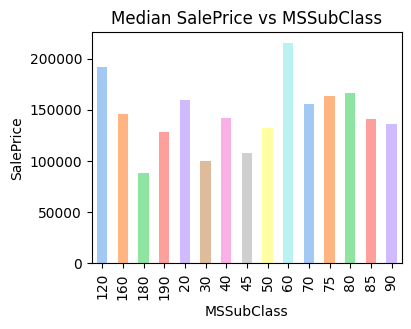

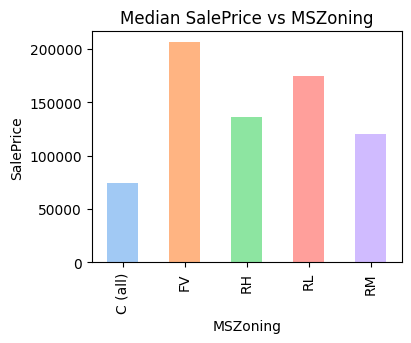

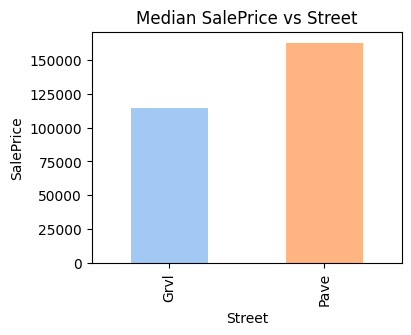

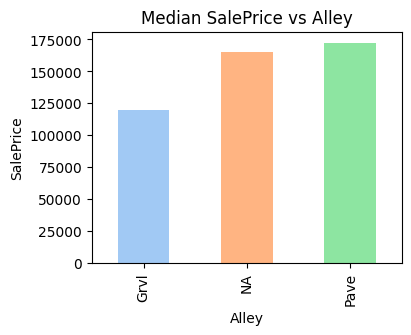

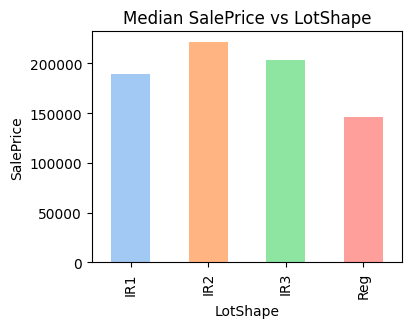

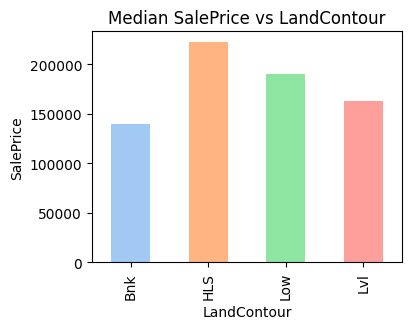

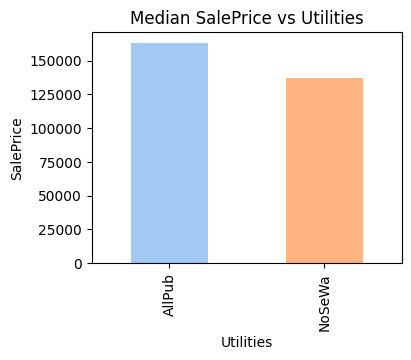

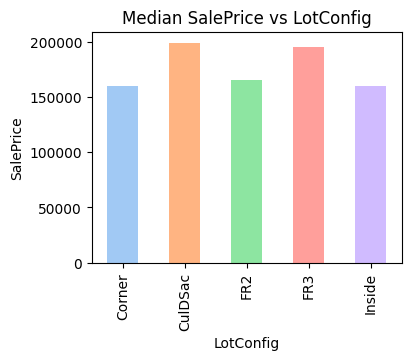

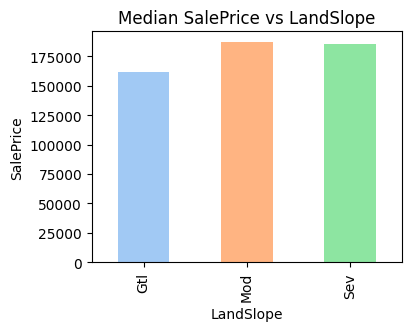

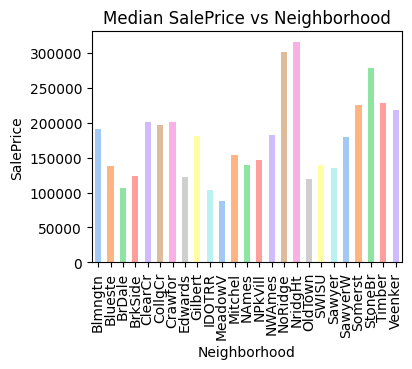

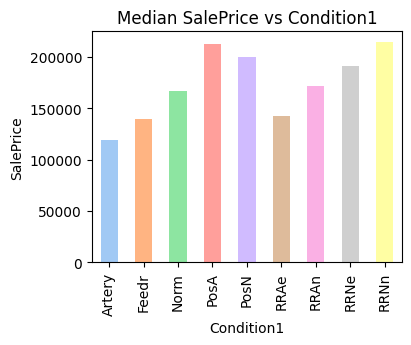

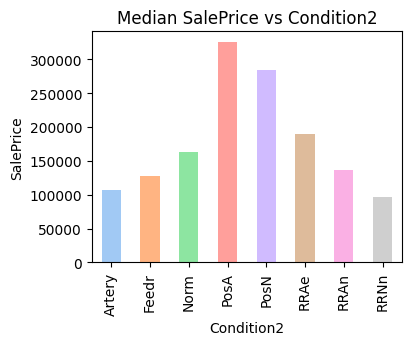

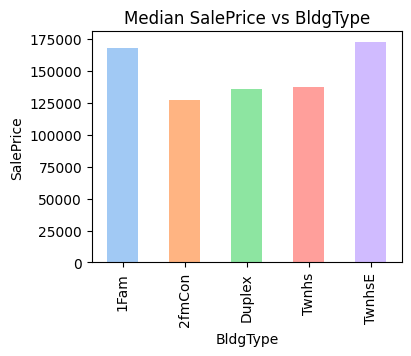

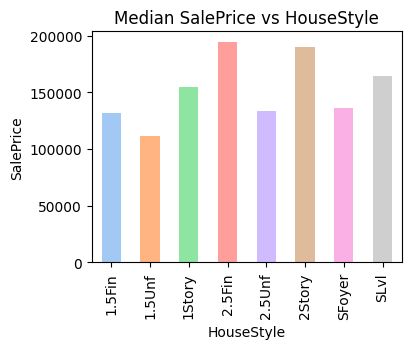

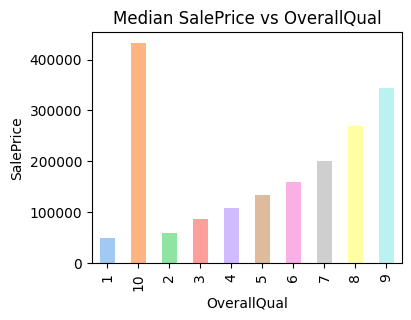

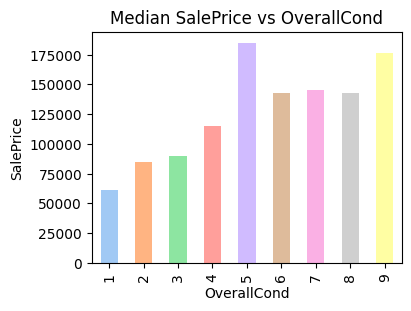

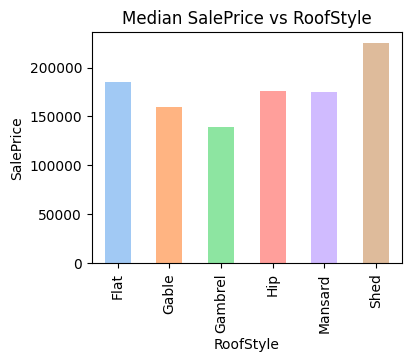

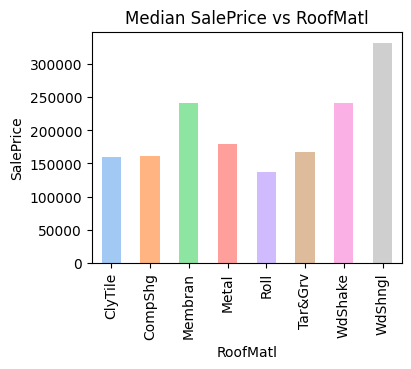

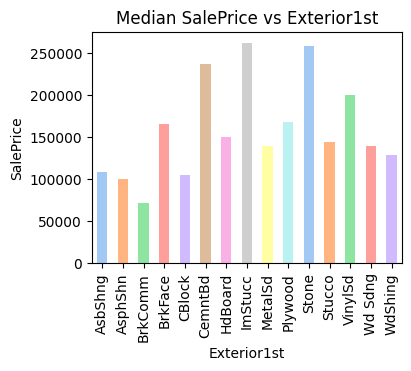

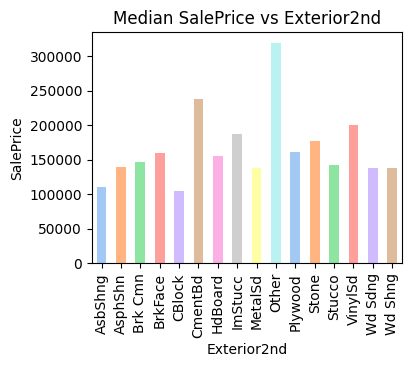

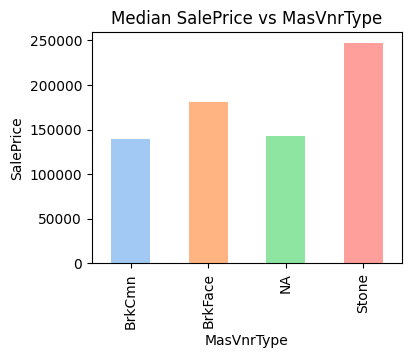

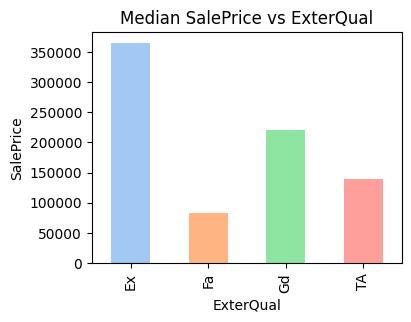

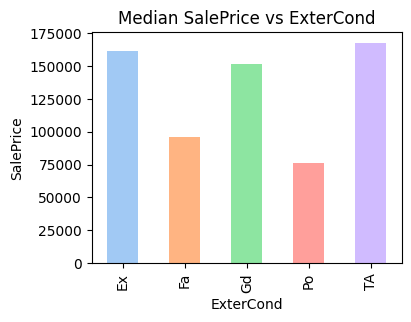

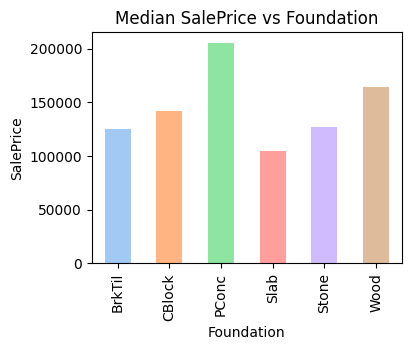

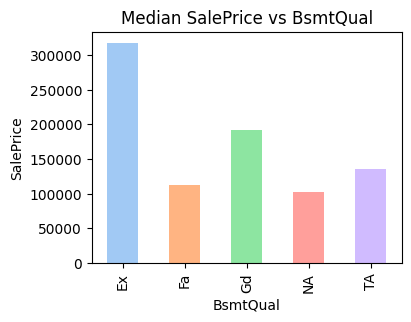

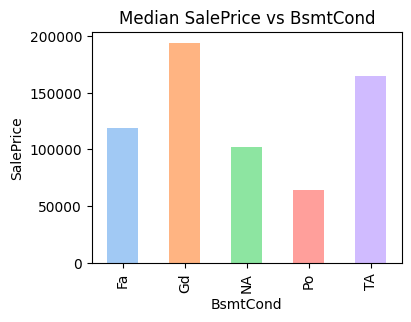

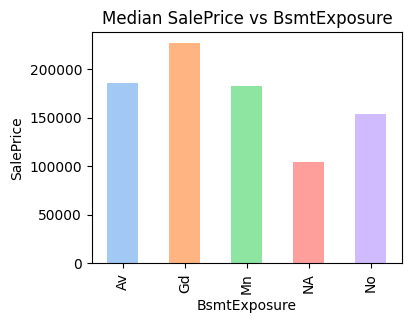

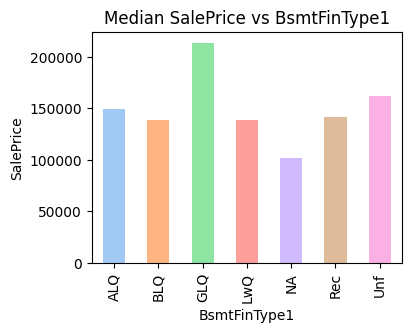

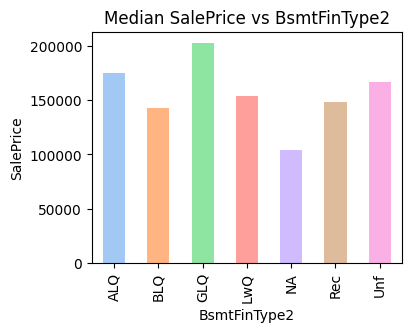

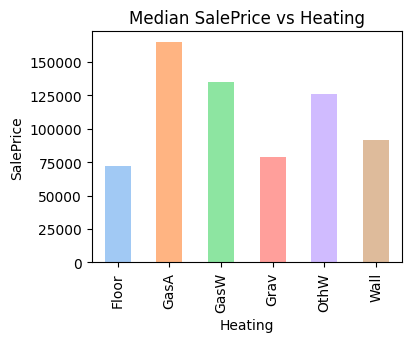

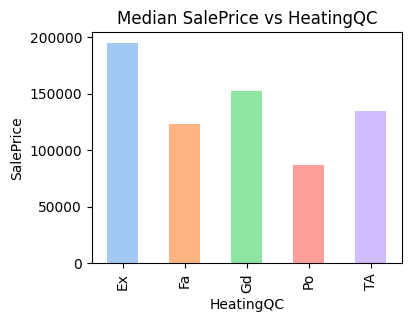

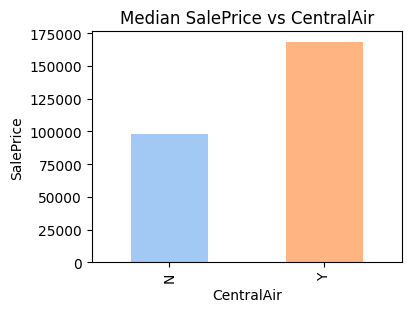

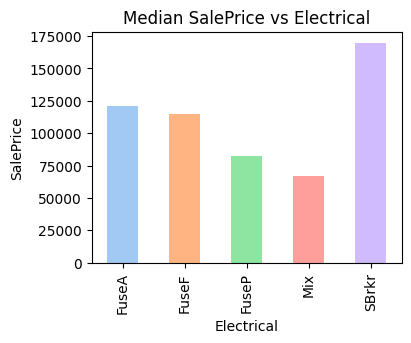

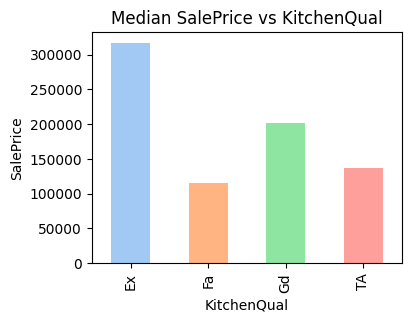

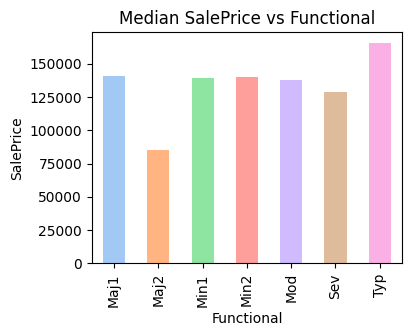

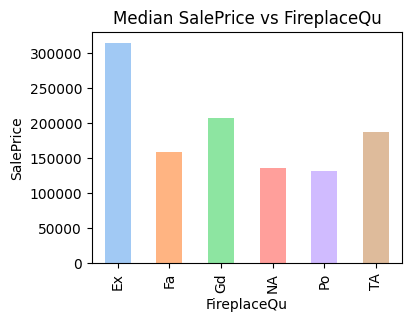

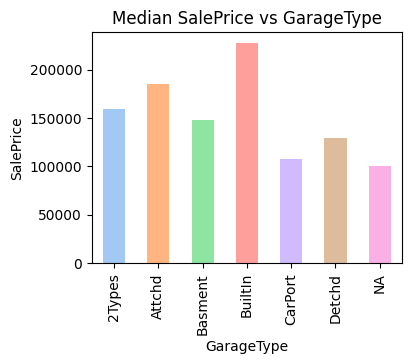

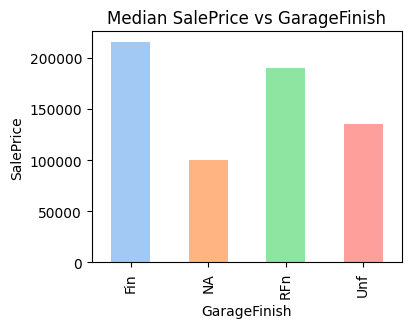

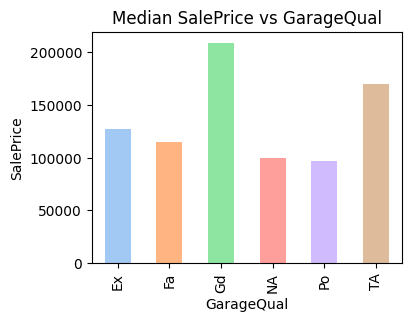

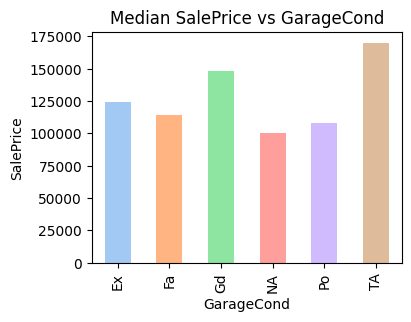

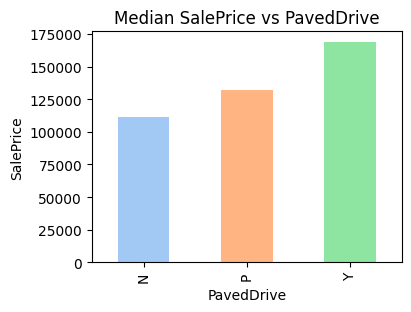

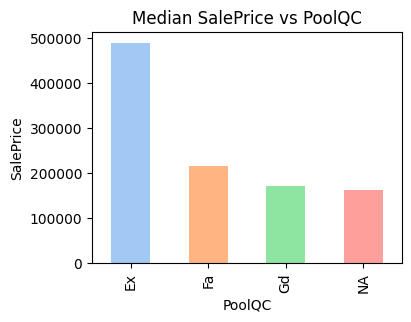

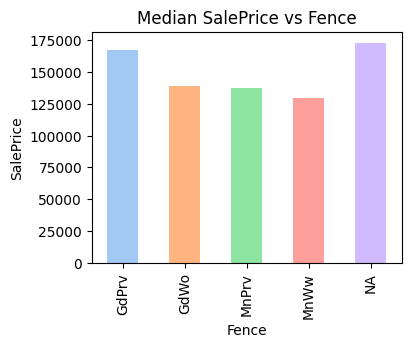

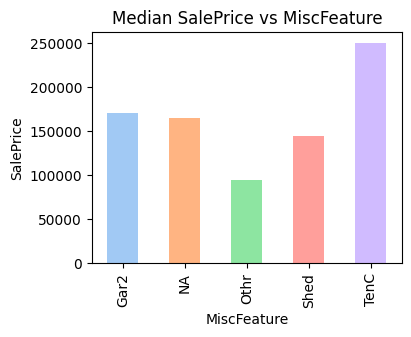

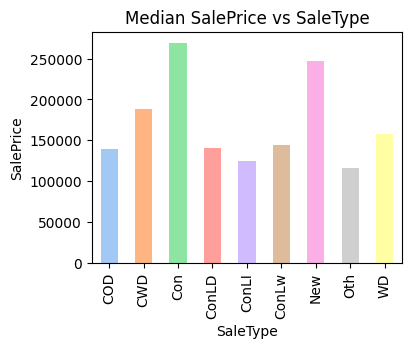

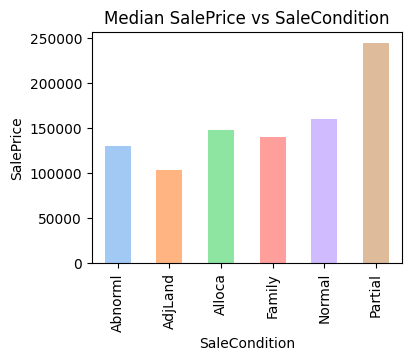

In [63]:
# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Explore the relationship between each categorical variable and the median SalePrice
for feature in categorical_features:
    # Create a copy of the dataset to avoid modifying the original
    data = dataset.copy()
    
    # Group the data by the categorical feature and plot the median SalePrice with the custom color palette
    data.groupby(feature)["SalePrice"].median().plot.bar(color=custom_palette)
    
    # Set the labels for the x and y axes
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    
    # Set the title of the plot
    plt.title("Median SalePrice vs {}".format(feature))
    
    # Display the bar plot
    plt.show()


### 5. Encoding Categorical Variables

In [64]:
# 'Street' 0-1 Encoding
#Since the 'Street' variable has 2 categories (Gravel and Pave),  0-1 transformation was used.
lbe = LabelEncoder()
lbe.fit_transform(dataset["Street"])
dataset["new_Street"] = lbe.fit_transform(dataset["Street"])

In [65]:
# In the data analysis, it appears that this column has 4 categories, but when the data is examined, it appears that only two categories are used. 
# Therefore 0-1 encoding was applied.
dataset["Utilities"].unique() 

array(['AllPub', 'NoSeWa'], dtype=object)

In [66]:
# 'Utilities' 0-1 Encoding
lbe = LabelEncoder()
lbe.fit_transform(dataset["Utilities"])
dataset["new_Utilities"] = lbe.fit_transform(dataset["Utilities"])

In [67]:
# 'CentralAir' 0-1 Encoding
lbe = LabelEncoder() 
lbe.fit_transform(dataset["CentralAir"])
dataset["new_CentralAir"] = lbe.fit_transform(dataset["CentralAir"])

In [68]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_Street,new_Utilities,new_CentralAir
0,60,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856.0,854,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500,1,0,1
1,20,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262.0,0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500,1,0,1
2,60,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920.0,866,0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500,1,0,1
3,70,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961.0,756,0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000,1,0,1
4,60,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145.0,1053,0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000,1,0,1


In ordinal encoding method, all features that contains NA are started from 0.

In [69]:
# 'LotShape' Ordinal Encoding
ordinal_mapping = {"IR3": 1, "IR2": 2, "IR1": 3, "Reg": 4}
dataset["new_LotShape"] = dataset["LotShape"].map(ordinal_mapping)

In [70]:
# 'LandContour' Ordinal Encoding
ordinal_mapping = {"Low": 1, "HLS": 2, "Bnk": 3, "Lvl": 4}
dataset["new_LandContour"] = dataset["LandContour"].map(ordinal_mapping)

In [71]:
# 'LandSlope' Ordinal Encoding
ordinal_mapping = {"Gtl": 1, "Mod": 2, "Sev": 3}
dataset["new_LandSlope"] = dataset["LandSlope"].map(ordinal_mapping)

In [72]:
# 'OverallQual' Ordinal Encoding
ordinal_mapping = {"1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9, "10": 10}
dataset["new_OverallQual"] = dataset["OverallQual"].map(ordinal_mapping)

In [73]:
# 'OverallCond' Ordinal Encoding
ordinal_mapping = {"1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9, "10": 10}
dataset["new_OverallCond"] = dataset["OverallCond"].map(ordinal_mapping)

In [74]:
# 'ExterQual' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_ExterQual"] = dataset["ExterQual"].map(ordinal_mapping)

In [75]:
# 'ExterCond' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_ExterCond"] = dataset["ExterCond"].map(ordinal_mapping)

In [76]:
# 'BsmtQual' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_BsmtQual"] = dataset["BsmtQual"].map(ordinal_mapping)

In [77]:
# 'BsmtCond' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_BsmtCond"] = dataset["BsmtCond"].map(ordinal_mapping)

In [78]:
# 'BsmtExposure' Ordinal Encoding
ordinal_mapping = {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}
dataset["new_BsmtExposure"] = dataset["BsmtExposure"].map(ordinal_mapping)

In [79]:
# 'BsmtFinType1' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
dataset["new_BsmtFinType1"] = dataset["BsmtFinType1"].map(ordinal_mapping)

In [80]:
# 'BsmtFinType2' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
dataset["new_BsmtFinType2"] = dataset["BsmtFinType2"].map(ordinal_mapping)

In [81]:
# 'HeatingQC' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_HeatingQC"] = dataset["HeatingQC"].map(ordinal_mapping)

In [82]:
# 'KitchenQual' Ordinal Encoding
ordinal_mapping = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_KitchenQual"] = dataset["KitchenQual"].map(ordinal_mapping)

In [83]:
# 'Functional' Ordinal Encoding
ordinal_mapping = {"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 7}
dataset["new_Functional"] = dataset["Functional"].map(ordinal_mapping)

In [84]:
# 'FireplaceQu' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_FireplaceQu"] = dataset["FireplaceQu"].map(ordinal_mapping)

In [85]:
# 'GarageFinish' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}
dataset["new_GarageFinish"] = dataset["GarageFinish"].map(ordinal_mapping)

In [86]:
# 'GarageQual' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_GarageQual"] = dataset["GarageQual"].map(ordinal_mapping)

In [87]:
# 'GarageCond' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
dataset["new_GarageCond"] = dataset["GarageCond"].map(ordinal_mapping)

In [88]:
# 'PavedDrive' Ordinal Encoding
ordinal_mapping = {"N": 1, "P": 2, "Y": 3}
dataset["new_PavedDrive"] = dataset["PavedDrive"].map(ordinal_mapping)

In [89]:
# 'PoolQC' Ordinal Encoding
ordinal_mapping = {"NA": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
dataset["new_PoolQC"] = dataset["PoolQC"].map(ordinal_mapping)

In [90]:
# 'Fence' Ordinal Encoding
ordinal_mapping = {"NA": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}
dataset["new_Fence"] = dataset["Fence"].map(ordinal_mapping)

In [91]:
# 'MSSubClass' Label Encoding
le = LabelEncoder()
dataset["new_MSSubClass"] = le.fit_transform(dataset["MSSubClass"])

In [92]:
# 'MSZoning' Label Encoding
le = LabelEncoder()
dataset["new_MSZoning"] = le.fit_transform(dataset["MSZoning"])

In [93]:
# 'Alley' Label Encoding
le = LabelEncoder()
dataset["new_Alley"] = le.fit_transform(dataset["Alley"])

In [94]:
# 'LotConfig' Label Encoding
le = LabelEncoder()
dataset["new_LotConfig"] = le.fit_transform(dataset["LotConfig"])

In [95]:
# 'Neighborhood' Label Encoding
le = LabelEncoder()
dataset["new_Neighborhood"] = le.fit_transform(dataset["Neighborhood"])

In [96]:
# 'Condition1' Label Encoding
le = LabelEncoder()
dataset["new_Condition1"] = le.fit_transform(dataset["Condition1"])

In [97]:
# 'Condition2' Label Encoding
le = LabelEncoder()
dataset["new_Condition2"] = le.fit_transform(dataset["Condition2"])

In [98]:
# 'BldgType' Label Encoding
le = LabelEncoder()
dataset["new_BldgType"] = le.fit_transform(dataset["BldgType"])

In [99]:
# 'HouseStyle' Label Encoding
le = LabelEncoder()
dataset["new_HouseStyle"] = le.fit_transform(dataset["HouseStyle"])

In [100]:
# 'RoofStyle' Label Encoding
le = LabelEncoder()
dataset["new_RoofStyle"] = le.fit_transform(dataset["RoofStyle"])

In [101]:
# 'RoofMatl' Label Encoding
le = LabelEncoder()
dataset["new_RoofMatl"] = le.fit_transform(dataset["RoofMatl"])

In [102]:
# 'Exterior1st' Label Encoding
le = LabelEncoder()
dataset["new_Exterior1st"] = le.fit_transform(dataset["Exterior1st"])

In [103]:
# 'Exterior2nd' Label Encoding
le = LabelEncoder()
dataset["new_Exterior2nd"] = le.fit_transform(dataset["Exterior2nd"])

In [104]:
# 'MasVnrType' Label Encoding
le = LabelEncoder()
dataset["new_MasVnrType"] = le.fit_transform(dataset["MasVnrType"])

In [105]:
# 'Foundation' Label Encoding
le = LabelEncoder()
dataset["new_Foundation"] = le.fit_transform(dataset["Foundation"])

In [106]:
# 'Heating' Label Encoding
le = LabelEncoder()
dataset["new_Heating"] = le.fit_transform(dataset["Heating"])

In [107]:
# 'Electrical' Label Encoding
le = LabelEncoder()
dataset["new_Electrical"] = le.fit_transform(dataset["Electrical"])

In [108]:
# 'GarageType' Label Encoding
le = LabelEncoder()
dataset["new_GarageType"] = le.fit_transform(dataset["GarageType"])

In [109]:
# 'MiscFeature' Label Encoding
le = LabelEncoder()
dataset["new_MiscFeature"] = le.fit_transform(dataset["MiscFeature"])

In [110]:
# 'SaleType' Label Encoding
le = LabelEncoder()
dataset["new_SaleType"] = le.fit_transform(dataset["SaleType"])

In [111]:
# 'SaleCondition' Label Encoding
le = LabelEncoder()
dataset["new_SaleCondition"] = le.fit_transform(dataset["SaleCondition"])

In [112]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_Street,new_Utilities,new_CentralAir,new_LotShape,new_LandContour,new_LandSlope,new_OverallQual,new_OverallCond,new_ExterQual,new_ExterCond,new_BsmtQual,new_BsmtCond,new_BsmtExposure,new_BsmtFinType1,new_BsmtFinType2,new_HeatingQC,new_KitchenQual,new_Functional,new_FireplaceQu,new_GarageFinish,new_GarageQual,new_GarageCond,new_PavedDrive,new_PoolQC,new_Fence,new_MSSubClass,new_MSZoning,new_Alley,new_LotConfig,new_Neighborhood,new_Condition1,new_Condition2,new_BldgType,new_HouseStyle,new_RoofStyle,new_RoofMatl,new_Exterior1st,new_Exterior2nd,new_MasVnrType,new_Foundation,new_Heating,new_Electrical,new_GarageType,new_MiscFeature,new_SaleType,new_SaleCondition
0,60,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856.0,854,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500,1,0,1,4,4,1,7,5,4,3,4,3,1,6,1,5,4,7,0,2,3,3,3,0,0,9,3,1,4,5,2,2,0,5,1,1,12,13,1,2,1,4,1,1,8,4
1,20,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262.0,0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500,1,0,1,4,4,1,6,8,3,3,4,3,4,5,1,5,3,7,3,2,3,3,3,0,0,4,3,1,2,24,1,2,0,2,1,1,8,8,2,1,1,4,1,1,8,4
2,60,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920.0,866,0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500,1,0,1,3,4,1,7,5,4,3,4,3,2,6,1,5,4,7,3,2,3,3,3,0,0,9,3,1,4,5,2,2,0,5,1,1,12,13,1,2,1,4,1,1,8,4
3,70,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961.0,756,0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000,1,0,1,3,4,1,7,5,3,3,3,4,1,5,1,4,4,7,4,1,3,3,3,0,0,10,3,1,0,6,2,2,0,5,1,1,13,15,2,0,1,4,5,1,8,0
4,60,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145.0,1053,0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000,1,0,1,3,4,1,8,5,4,3,4,3,3,6,1,5,4,7,3,2,3,3,3,0,0,9,3,1,2,15,2,2,0,5,1,1,12,13,1,2,1,4,1,1,8,4


In [113]:
# Print the shape of the dataset, which represents the number of rows and columns
print(dataset.shape)

# Observe that 43 new columns have been added

(1460, 126)


### 6. Exploring Distribution Situations (Skewness, Kurtosis, Normal (Gaussian) Distribution)

##### 6.1. Skewness

In [114]:
# Skewness was observed by adding newly created features
numerical_features_new = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

# Evaluate skewness for each numerical feature in the dataset
skewed_features = dataset[numerical_features_new].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Organize the skewness information into a DataFrame
skewness = pd.DataFrame({"Skew": skewed_features})

# Display the top entries in the skewness dataset
skewness

,Skew
new_Utilities,38.170678
MiscVal,24.451640
new_PoolQC,16.834252
PoolArea,14.813135
new_Condition2,13.158307
3SsnPorch,10.293752
new_Heating,9.844972
LowQualFinSF,9.002080
new_RoofMatl,8.101068
new_MiscFeature,5.011625


In [128]:
# Filter features with skewness greater than 0.8
skewness = skewness[abs(skewness > 0.8)]

# Print the number of features to be transformed
print("There are {} skewed numerical features to Box Cox transform.".format(skewness.shape[0]))

# Get the list of skewed features
skewed_features = skewness.index

# Define the lambda parameter for the Box Cox transformation
lamda = 0.15

# Apply Box Cox transformation to the selected features
for feature in skewed_features:
    # Add 1 to handle zero values before applying Box Cox transformation
    dataset[feature] += 1
    dataset[feature] = boxcox1p(dataset[feature], lamda)

# Apply log transformation to the skewed features
dataset[skewed_features] = np.log1p(dataset[skewed_features])

# Print a message indicating that skewness has been handled using Box Cox Transformation
print("Skewness has been handled using Box Cox Transformation.")


There are 80 skewed numerical features to Box Cox transform.
Skewness has been handled using Box Cox Transformation.


##### 6.2. Kurtosis

In [116]:
# Evaluate kurtosis for each numerical feature in the dataset
kurtosis_values = dataset[numerical_features_new].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)

# Organize the kurtosis information into a DataFrame
kurtosis_dataset = pd.DataFrame({"Kurtosis": kurtosis_values})

# Display the top entries in the kurtosis dataset
print(kurtosis_dataset)

# Choose a threshold for kurtosis that indicates high kurtosis
kurtosis_threshold = 5

# Identify features with high kurtosis
high_kurtosis_features = kurtosis_dataset[kurtosis_dataset["Kurtosis"] > kurtosis_threshold].index

# Apply transformations to handle high kurtosis
for feature in high_kurtosis_features:
    # Check if the feature has positive kurtosis
    if kurtosis_dataset.loc[feature, "Kurtosis"] > 0:
        # Apply Box Cox transformation
        dataset[feature], _ = boxcox(dataset[feature] + 1)  # Adding 1 to handle zero values

    # Check if the feature has negative kurtosis
    elif kurtosis_dataset.loc[feature, "Kurtosis"] < 0:
        # Apply log transformation
        dataset[feature] = np.log1p(dataset[feature])

    # Optional: Winsorizing as an additional step
    dataset[feature] = winsorize(dataset[feature], limits=[0.05, 0.05])

# Display a message indicating that kurtosis has been handled
print("Kurtosis has been handled using transformations.")

                      Kurtosis
new_Utilities      1455.000685
new_PoolQC          254.172426
new_Street          238.337460
PoolArea            203.795417
new_Condition2      160.303355
new_Heating          74.252222
new_Functional       58.248151
new_RoofMatl         57.990540
3SsnPorch            57.438301
LowQualFinSF         53.117617
TotalBsmtSF          30.515971
new_BsmtCond         27.107552
MiscVal              24.221999
new_MiscFeature      23.081659
new_SaleType         22.614261
KitchenAbvGr         19.660724
new_LandSlope        19.492110
new_BsmtQual         16.480921
new_Alley            15.310443
new_MSZoning         15.267959
new_LandContour      15.073863
BsmtHalfBath         13.933153
GarageYrBlt          13.082619
GarageArea           11.931869
new_GarageQual       11.722299
new_GarageCond       11.664689
new_Exterior1st      10.679676
new_CentralAir       10.438018
new_Exterior2nd      10.289585
new_PavedDrive        9.772339
new_ExterCond         8.876297
new_Cond

##### 6.3. Normal (Gaussian) Distribution

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot, shapiro, anderson
from statsmodels.distributions.empirical_distribution import ECDF

def visualize_normality(column_data):
    # Histogram
    sns.histplot(column_data, kde=True)
    plt.title('Histogram')
    plt.show()

    # Q-Q Plot
    probplot(column_data, dist='norm', plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Kernel Density Plot
    sns.kdeplot(column_data)
    plt.title('Kernel Density Plot')
    plt.show()

    # Descriptive Statistics
    mean_value = column_data.mean()
    std_dev = column_data.std()
    print(f'Mean: {mean_value}, Standard Deviation: {std_dev}')

    # Shapiro-Wilk Test
    stat, p_value = shapiro(column_data)
    print(f'Shapiro-Wilk Test - Statistic: {stat}, p-value: {p_value}')

    # Anderson-Darling Test
    result = anderson(column_data)
    print(f'Anderson-Darling Test - Statistic: {result.statistic}, Critical Values: {result.critical_values}')

    # Visual Comparison - Empirical vs. Theoretical CDF
    ecdf = ECDF(column_data)
    plt.plot(ecdf.x, ecdf.y, label='Empirical CDF')
    plt.plot(
        np.sort(np.random.normal(mean_value, std_dev, len(column_data))),
        np.linspace(0, 1, len(column_data), endpoint=False),
        label='Theoretical CDF'
    )
    plt.legend()
    plt.title('Empirical vs. Theoretical CDF')
    plt.show()

According to Chat GPT, normal distribution analysis is usually applied on continuous variables. Such variables are those that can take a reel structure and have production values consistently within a range. In particular, normal distribution records are aimed at evaluating whether they are continuously and regularly distributed. Therefore, it is observed LotFrontage, LotArea, 1stFlrSF, GrLivArea, and SalePrice features.

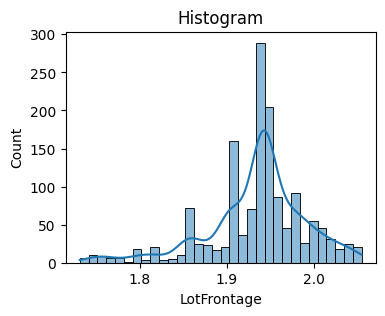

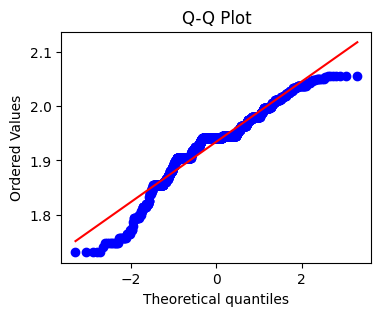

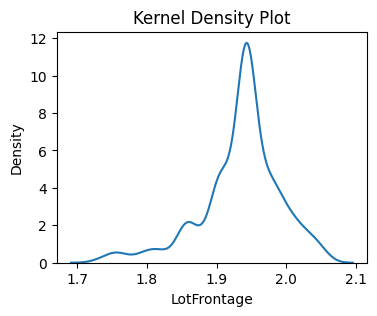

Mean: 1.9346173280835732, Standard Deviation: 0.057182492388479764
Shapiro-Wilk Test - Statistic: 0.933584988117218, p-value: 5.541125152100549e-25
Anderson-Darling Test - Statistic: 34.13770956930648, Critical Values: [0.574 0.654 0.785 0.916 1.089]


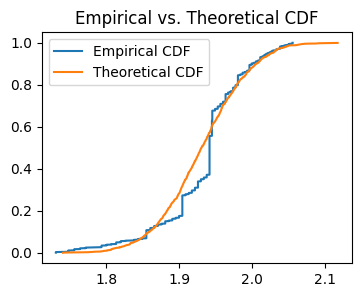

In [118]:
# Visualize the normality of the "LotFrontage" column
visualize_normality(dataset["LotFrontage"])

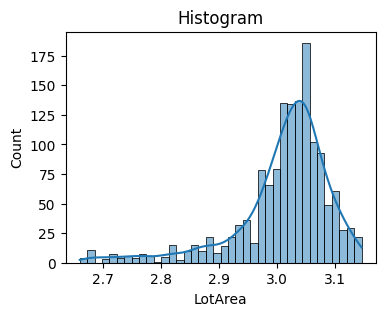

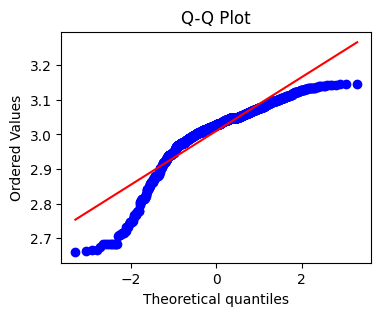

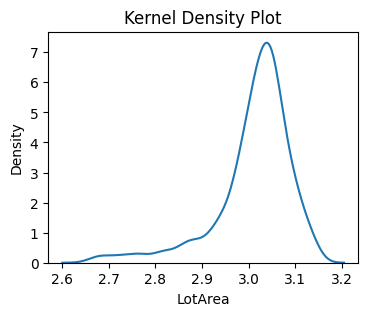

Mean: 3.0101911468414366, Standard Deviation: 0.0835420415532776
Shapiro-Wilk Test - Statistic: 0.8607867956161499, p-value: 4.301677954973486e-34
Anderson-Darling Test - Statistic: 55.629040981248636, Critical Values: [0.574 0.654 0.785 0.916 1.089]


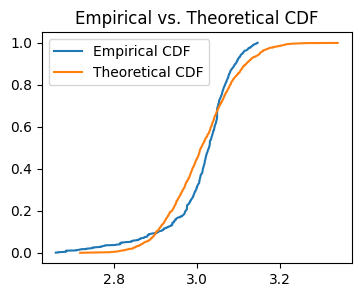

In [119]:
# Visualize the normality of the "LotArea" column
visualize_normality(dataset["LotArea"])

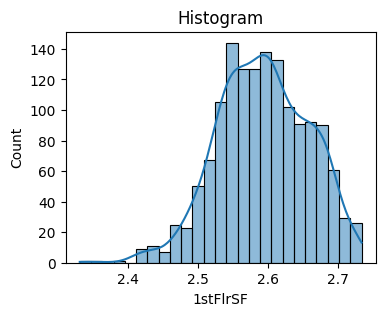

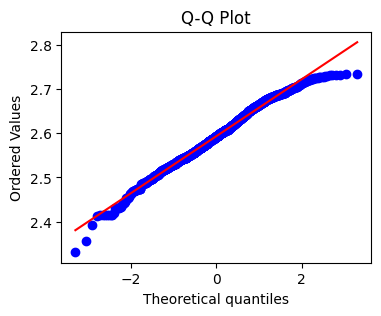

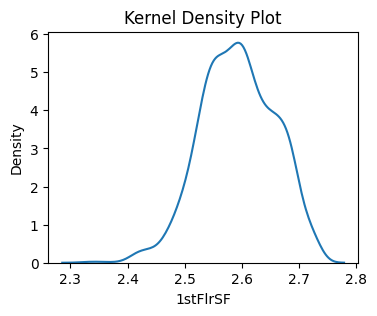

Mean: 2.593218959150315, Standard Deviation: 0.06446488108855652
Shapiro-Wilk Test - Statistic: 0.991727888584137, p-value: 2.585396146059793e-07
Anderson-Darling Test - Statistic: 2.094526557392328, Critical Values: [0.574 0.654 0.785 0.916 1.089]


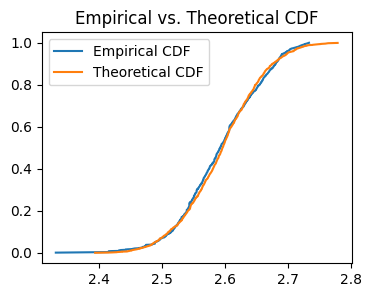

In [120]:
# Visualize the normality of the "1stFlrSF" column
visualize_normality(dataset["1stFlrSF"])

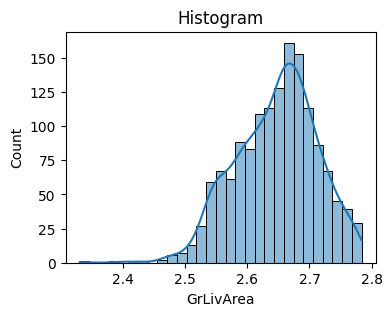

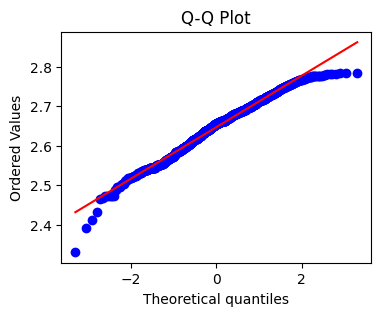

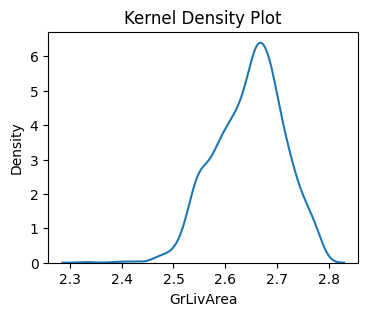

Mean: 2.647081656415022, Standard Deviation: 0.06533793625891596
Shapiro-Wilk Test - Statistic: 0.9874260425567627, p-value: 6.295761134644806e-10
Anderson-Darling Test - Statistic: 4.094210543782765, Critical Values: [0.574 0.654 0.785 0.916 1.089]


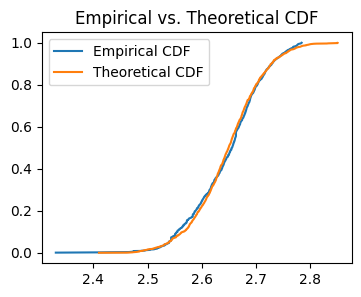

In [121]:
# Visualize the normality of the "GrLivArea" column
visualize_normality(dataset["GrLivArea"])

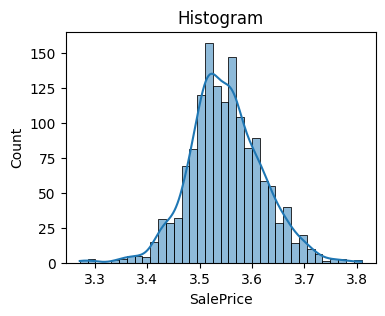

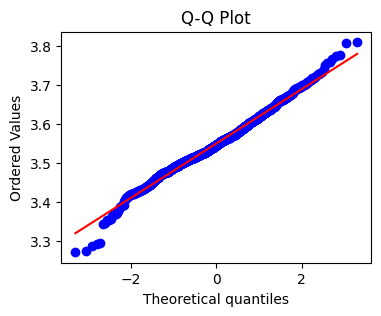

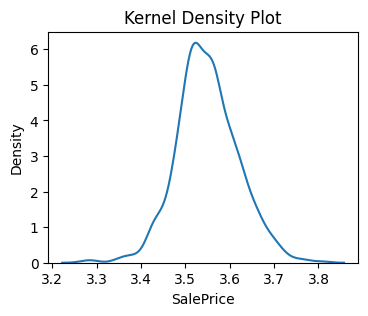

Mean: 3.549569945632629, Standard Deviation: 0.06966626855290702
Shapiro-Wilk Test - Statistic: 0.9914138317108154, p-value: 1.5809143860678887e-07
Anderson-Darling Test - Statistic: 3.2886053414649723, Critical Values: [0.574 0.654 0.785 0.916 1.089]


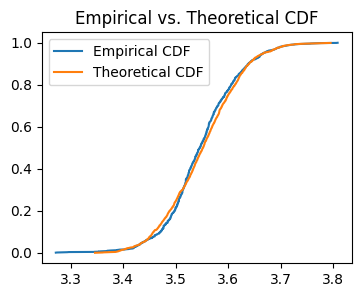

In [122]:
# Visualize the normality of the "SalePrice" column
visualize_normality(dataset["SalePrice"])

I'm where my brain is stopped. It seems to me all are normally distributed.

In [123]:
print("End of the Exploratory Data Analysis! Yay!! :D")

End of the Exploratory Data Analysis! Yay!! :D
